## Chronic Kidney Disease Dataset analysis

This notebook analyzes dataset obtained from patients diagnosed with Chronic Kidney Diease (CKD). The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, medication usage, symptoms, quality of life scores, environmental exposures, and health behaviors.

Source: https://www.kaggle.com/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis

Contributors: Adithya Hadidi, Kateryna Skoropad, Zarrin Rasizadeh, Anjali Deshpande

In [108]:
# Import standard libraries in this section
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score


from sklearn.metrics import roc_curve, precision_recall_curve

from sklearn.model_selection import GridSearchCV



## Data exploration

In [109]:
df = pd.read_csv("../data/raw/Chronic_Kidney_Dsease_data.csv")

df

PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0             1   71       0          0                    0               2   
1             2   34       0          0                    1               3   
2             3   80       1          1                    0               1   
3             4   40       0          2                    0               1   
4             5   43       0          1                    1               2   
...         ...  ...     ...        ...                  ...             ...   
1654       1655   90       0          0                    1               2   
1655       1656   34       0          0                    2               1   
1656       1657   84       0          0                    2               3   
1657       1658   90       0          0                    2               2   
1658       1659   34       1          1                    0               0   

            BMI  Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  \
0     31.069414        1            5.128112          1.676220     0.240386   
1     29.692119        1           18.609552          8.377574     6.503233   
2     37.394822        1           11.882429          9.607401     2.104828   
3     31.329680        0           16.020165          0.408871     6.964422   
4     23.726311        0            7.944146          0.780319     3.097796   
...         ...      ...                 ...               ...          ...   
1654  39.677059        1            1.370151          4.157954     8.602873   
1655  28.922015        0            3.372073          9.647525     9.836919   
1656  21.951219        0           15.825955          7.349964     5.038194   
1657  24.964149        0           12.967462          0.618614     4.557577   
1658  19.253258        1           11.396510          7.446314     0.757396   

      SleepQuality  FamilyHistoryKidneyDisease  FamilyHistoryHypertension  \
0         4.076434                           0                          0   
1         7.652813                           1                          1   
2         4.392786                           0                          0   
3         6.282274                           0                          0   
4         4.021639                           0                          0   
...            ...                         ...                        ...   
1654      5.239288                           0                          0   
1655      6.401662                           0                          0   
1656      8.440859                           0                          0   
1657      5.527100                           0                          0   
1658      8.191678                           1                          1   

      FamilyHistoryDiabetes  PreviousAcuteKidneyInjury  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   
...                     ...                        ...   
1654                      0                          0   
1655                      0                          0   
1656                      0                          0   
1657                      0                          0   
1658                      0                          0   

      UrinaryTractInfections  SystolicBP  DiastolicBP  FastingBloodSugar  \
0                          0         113           83          72.510788   
1                          0         120           67         100.848875   
2                          0         147          106         160.989441   
3                          0         117           65         188.506620   
4                          0          98           66          82.156699   
...               

In [110]:
df.shape # number of rows and columns

(1659, 54)

In [111]:
df.head()

PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0          1   71       0          0                    0               2   
1          2   34       0          0                    1               3   
2          3   80       1          1                    0               1   
3          4   40       0          2                    0               1   
4          5   43       0          1                    1               2   

         BMI  Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  \
0  31.069414        1            5.128112          1.676220     0.240386   
1  29.692119        1           18.609552          8.377574     6.503233   
2  37.394822        1           11.882429          9.607401     2.104828   
3  31.329680        0           16.020165          0.408871     6.964422   
4  23.726311        0            7.944146          0.780319     3.097796   

   SleepQuality  FamilyHistoryKidneyDisease  FamilyHistoryHypertension  \
0      4.076434                           0                          0   
1      7.652813                           1                          1   
2      4.392786                           0                          0   
3      6.282274                           0                          0   
4      4.021639                           0                          0   

   FamilyHistoryDiabetes  PreviousAcuteKidneyInjury  UrinaryTractInfections  \
0                      0                          0                       0   
1                      0                          0                       0   
2                      0                          0                       0   
3                      0                          0                       0   
4                      0                          0                       0   

   SystolicBP  DiastolicBP  FastingBloodSugar     HbA1c  SerumCreatinine  \
0         113           83          72.510788  9.212397         4.962531   
1         120           67         100.848875  4.604989         3.156799   
2         147          106         160.989441  5.432599         3.698236   
3         117           65         188.506620  4.144466         2.868468   
4          98           66          82.156699  4.262979         3.964877   

   BUNLevels        GFR  ProteinInUrine         ACR  SerumElectrolytesSodium  \
0  25.605949  45.703204        0.744980  123.849426               137.652501   
1  31.338166  55.784504        3.052317   88.539095               138.141335   
2  39.738169  67.559032        1.157839   21.170892               142.970116   
3  21.980958  33.202542        3.745871  123.779699               137.106913   
4  12.216366  56.319082        2.570993  184.852046               140.627812   

   SerumElectrolytesPotassium  SerumElectrolytesCalcium  \
0                    3.626058                 10.314420   
1                    5.332871                  9.604196   
2                    4.330891                  9.885786   
3                    3.810741                  9.995894   
4                    4.866765                  8.907622   

   SerumElectrolytesPhosphorus  HemoglobinLevels  CholesterolTotal  \
0                     3.152648         16.114679        207.728670   
1                     2.855443         15.349205        189.450727   
2                     4.353513         13.018834        284.137622   
3                     4.016134         15.056339        235.112124   
4                     3.947907         16.690561        258.277566   

   CholesterolLDL  CholesterolHDL  CholesterolTriglycerides  ACEInhibitors  \
0       85.863656       21.967957                212.095215              0   
1       86.378670       87.569756                255.451314              0   
2      132.269872       20.049798                251.902583              0   
3       93.443669       58.260291                392.338425              0   
4      171.758356       21.583213                370.523877

In [112]:
# summary of the DataFrame (data types and number of non-null values in each column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [113]:
# statistical summaries of the numerical columns
df.describe()

PatientID          Age       Gender   Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.000000  1659.00000          1659.000000   
mean    830.000000    54.441230     0.515371     0.71308             0.977697   
std     479.056364    20.549757     0.499914     1.00043             0.776686   
min       1.000000    20.000000     0.000000     0.00000             0.000000   
25%     415.500000    36.000000     0.000000     0.00000             0.000000   
50%     830.000000    54.000000     1.000000     0.00000             1.000000   
75%    1244.500000    72.000000     1.000000     1.00000             2.000000   
max    1659.000000    90.000000     1.000000     3.00000             2.000000   

       EducationLevel          BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1659.000000  1659.000000         1659.000000   
mean         1.693189    27.620049     0.292948            9.969831   
std          0.910611     7.288670     0.455252            5.798787   
min          0.000000    15.033888     0.000000            0.021740   
25%          1.000000    21.471449     0.000000            5.051156   
50%          2.000000    27.652077     0.000000            9.951503   
75%          2.000000    34.015849     1.000000           14.967100   
max          3.000000    39.993532     1.000000           19.992713   

       PhysicalActivity  DietQuality  SleepQuality  \
count       1659.000000  1659.000000   1659.000000   
mean           5.024247     5.028544      6.942324   
std            2.866274     2.865777      1.704159   
min            0.001186     0.002407      4.001053   
25%            2.555038     2.558443      5.487083   
50%            5.072395     4.989810      6.933255   
75%            7.460563     7.428290      8.346298   
max            9.998167     9.998927      9.984197   

       FamilyHistoryKidneyDisease  FamilyHistoryHypertension  \
count                 1659.000000                1659.000000   
mean                     0.141049                   0.301386   
std                      0.348177                   0.458998   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   1.000000   
max                      1.000000                   1.000000   

       FamilyHistoryDiabetes  PreviousAcuteKidneyInjury  \
count            1659.000000                1659.000000   
mean                0.257384                   0.105485   
std                 0.437325                   0.307270   
min                 0.000000                   0.000000   
25%                 0.000000                   0.000000   
50%                 0.000000                   0.000000   
75%                 1.000000                   0.000000   
max                 1.000000                   1.000000   

       UrinaryTractInfections   SystolicBP  DiastolicBP  FastingBloodSugar  \
count             1659.000000  1659.000000  1659.000000        1659.000000   
mean                 0.210368   134.392405    89.313442         132.529429   
std                  0.407693    25.767794    17.354479          36.563035   
min                  0.000000    90.000000    60.000000          70.044768   
25%                  0.000000   113.000000    75.000000         100.504503   
50%                  0.000000   134.000000    89.000000         131.478423   
75%                  0.000000   157.000000   104.000000         163.108151   
max                  1.000000   179.000000   119.000000         199.960429   

             HbA1c  SerumCreatinine    BUNLevels          GFR  ProteinInUrine  \
count  1659.000000      1659.000000  1659.000000  1659.000000     1659.000000   
mean      6.983682         2.753198    27.578147    66.829202        2.493736   
std       1.734714         1.317168    12.808062    30.050836        1.449695   
min       4.0004

## 1. Data Cleaning and Preprocessing

Drop *PatientID* and *DoctorInCharge* columns since they don't provide any information. Also cleaning the data makes it readily usable.

In [114]:
# Display the summary statistics of the dataset
columns_to_drop = ["DoctorInCharge","PatientID"]
df = df.drop(columns_to_drop, axis = 1)
random_seed=42
np.random.seed(random_seed)

In [115]:
print(df.shape)

(1659, 52)


In [116]:
df.isnull().sum()

Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCalcium         0
SerumElectrolytesPho

In [117]:

# Specify the response variable and features
response_column_name = 'Diagnosis'
# All variables except 'Diagnosis' is predictor
predictors = [col for col in df.columns if col != response_column_name]

# Split data into features and target variable
X = df[predictors]
y = df[response_column_name]

## 2. Univariate Analysis

(Source: https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/)

### Summary Statistics

Display summary statistics for numerical and categorical columns

Display each feature with its count, mean, std deviation, min, max and 25%, 50%, 75% percentiles indicating the distribution of values.

In [118]:

# Display all columns 
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.width', None)  # None means unlimited width
df.describe(exclude=None)


Age       Gender   Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.00000          1659.000000   
mean     54.441230     0.515371     0.71308             0.977697   
std      20.549757     0.499914     1.00043             0.776686   
min      20.000000     0.000000     0.00000             0.000000   
25%      36.000000     0.000000     0.00000             0.000000   
50%      54.000000     1.000000     0.00000             1.000000   
75%      72.000000     1.000000     1.00000             2.000000   
max      90.000000     1.000000     3.00000             2.000000   

       EducationLevel          BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1659.000000  1659.000000         1659.000000   
mean         1.693189    27.620049     0.292948            9.969831   
std          0.910611     7.288670     0.455252            5.798787   
min          0.000000    15.033888     0.000000            0.021740   
25%          1.000000    21.471449     0.000000            5.051156   
50%          2.000000    27.652077     0.000000            9.951503   
75%          2.000000    34.015849     1.000000           14.967100   
max          3.000000    39.993532     1.000000           19.992713   

       PhysicalActivity  DietQuality  SleepQuality  \
count       1659.000000  1659.000000   1659.000000   
mean           5.024247     5.028544      6.942324   
std            2.866274     2.865777      1.704159   
min            0.001186     0.002407      4.001053   
25%            2.555038     2.558443      5.487083   
50%            5.072395     4.989810      6.933255   
75%            7.460563     7.428290      8.346298   
max            9.998167     9.998927      9.984197   

       FamilyHistoryKidneyDisease  FamilyHistoryHypertension  \
count                 1659.000000                1659.000000   
mean                     0.141049                   0.301386   
std                      0.348177                   0.458998   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   1.000000   
max                      1.000000                   1.000000   

       FamilyHistoryDiabetes  PreviousAcuteKidneyInjury  \
count            1659.000000                1659.000000   
mean                0.257384                   0.105485   
std                 0.437325                   0.307270   
min                 0.000000                   0.000000   
25%                 0.000000                   0.000000   
50%                 0.000000                   0.000000   
75%                 1.000000                   0.000000   
max                 1.000000                   1.000000   

       UrinaryTractInfections   SystolicBP  DiastolicBP  FastingBloodSugar  \
count             1659.000000  1659.000000  1659.000000        1659.000000   
mean                 0.210368   134.392405    89.313442         132.529429   
std                  0.407693    25.767794    17.354479          36.563035   
min                  0.000000    90.000000    60.000000          70.044768   
25%                  0.000000   113.000000    75.000000         100.504503   
50%                  0.000000   134.000000    89.000000         131.478423   
75%                  0.000000   157.000000   104.000000         163.108151   
max                  1.000000   179.000000   119.000000         199.960429   

             HbA1c  SerumCreatinine    BUNLevels          GFR  ProteinInUrine  \
count  1659.000000      1659.000000  1659.000000  1659.000000     1659.000000   
mean      6.983682         2.753198    27.578147    66.829202        2.493736   
std       1.734714         1.317168    12.808062    30.050836        1.449695   
min       4.000405         0.501799     5.000249    15.107850        0.000900   
25%       5.494988         1.583255    16.398275    41.149

### Data Visualization

For the numerical variables, visualizing distributions using histograms, box plots, or density plots to understand the spread and skewness of data.

#### Histograms

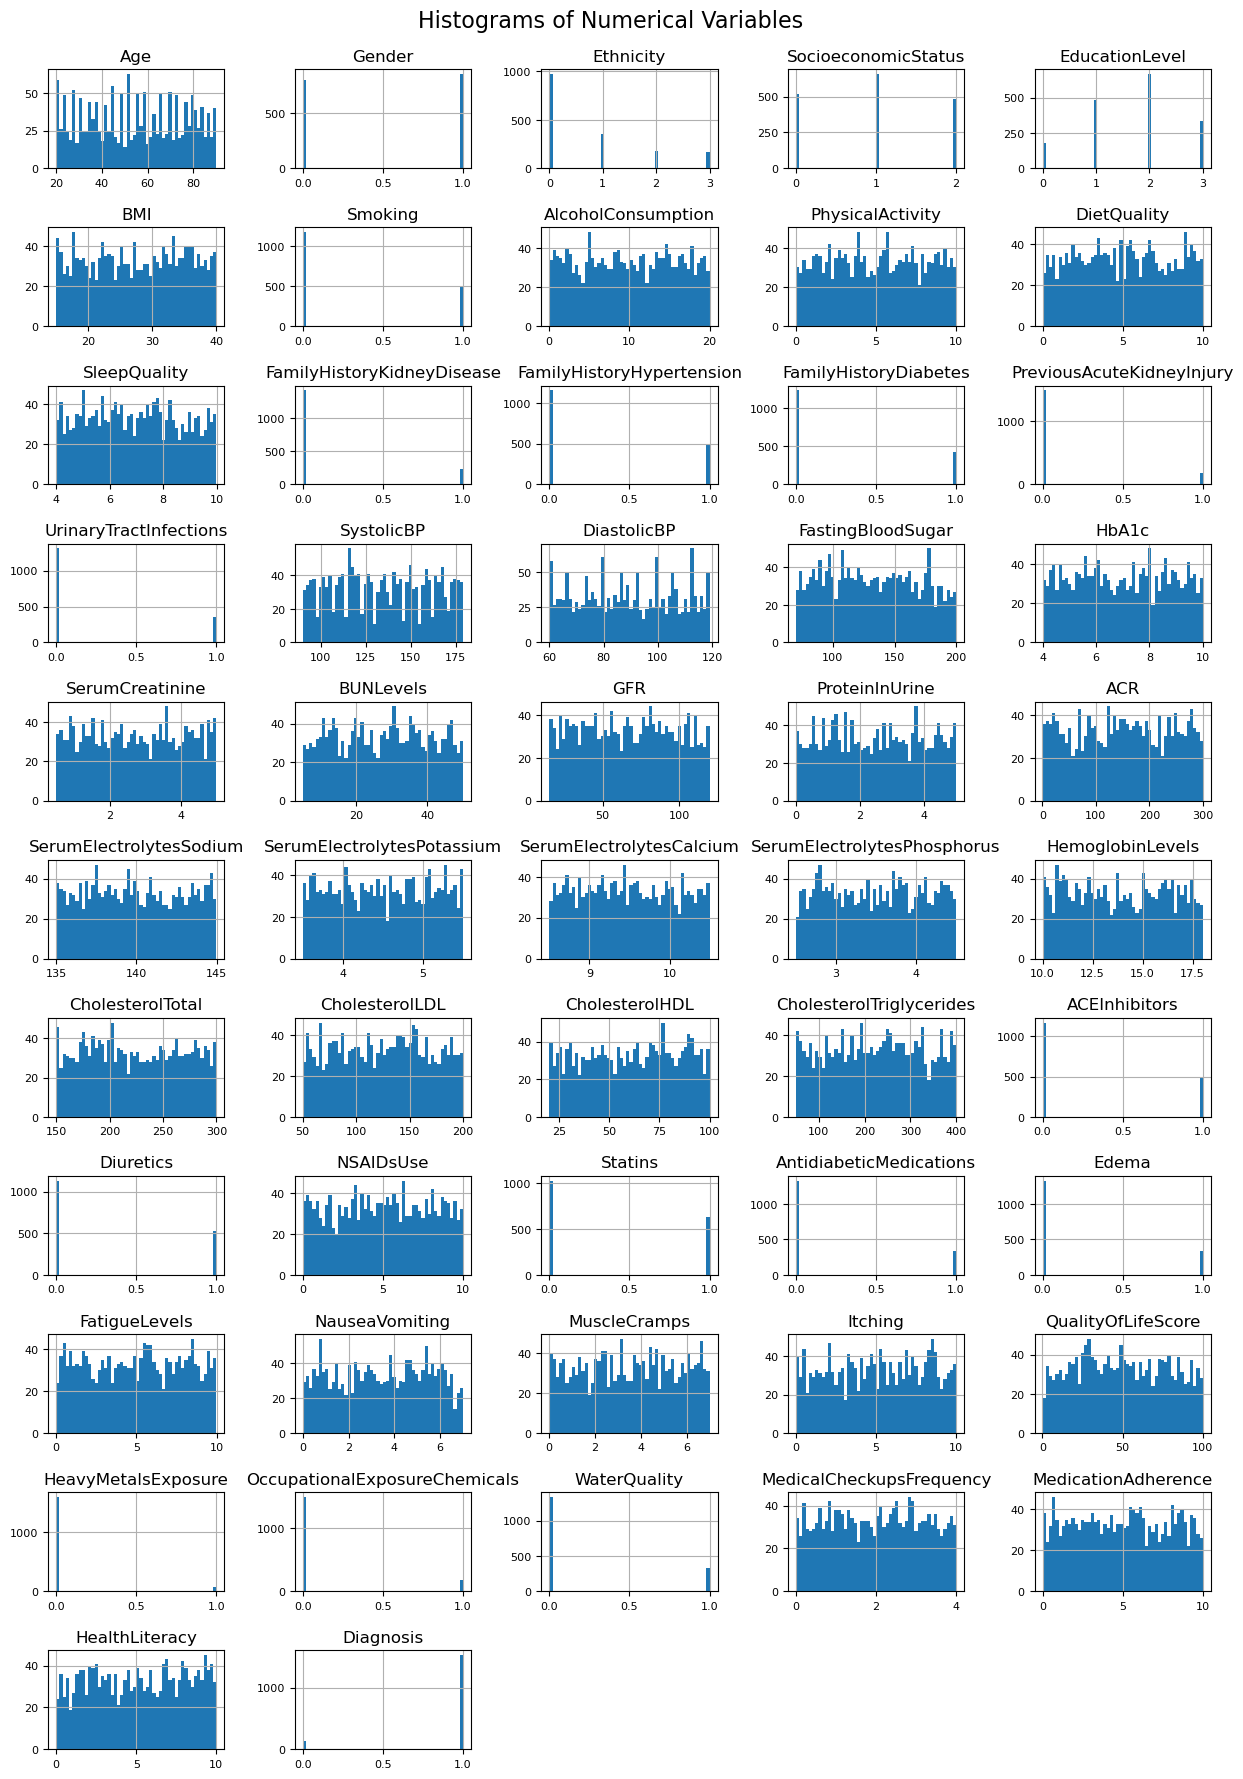

In [119]:

# Distribution of numerical variables in the df dataset
# Each histogram represents the frequency distribution of a numerical variable to gain insights into data distribution and skewness of data

df.hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8, layout=(len(df.columns) // 5 + 1, 5))
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.subplots_adjust(top=0.95, hspace=0.6, wspace=0.4)
plt.show()


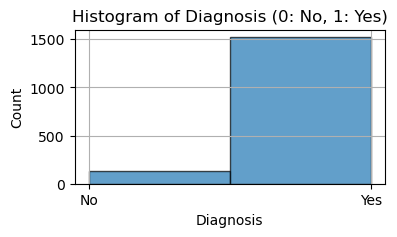

In [120]:
# Add code for histogram showing 'Diagnosis' as x-axis and count as y-axis
# Plotting the histogram for 'Diagnosis'
plt.figure(figsize=(4, 2))
plt.hist(df['Diagnosis'], bins=2, edgecolor='black', alpha=0.7, align='mid')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Histogram of Diagnosis (0: No, 1: Yes)')
plt.xticks([0, 1], ['No', 'Yes'])  # Replace x-axis ticks with 'No' and 'Yes'
plt.grid(True)
plt.show()

This histogram illustrates the distribution of diagnosis in the dataset, categorized as 'No' (0) and 'Yes' (1). The majority of cases fall under 'Yes', indicating a predominant occurance of positive
diagnoses compared to negative diagnoses, and therefore a skewed distribution towards positive diagnoses in the dataset.

#### Scatter plots

This dataset contains large number of clinical measurements. For simplicity, lets just take 'GFR' and 'ProteinInUrine' to draw a scatter plot

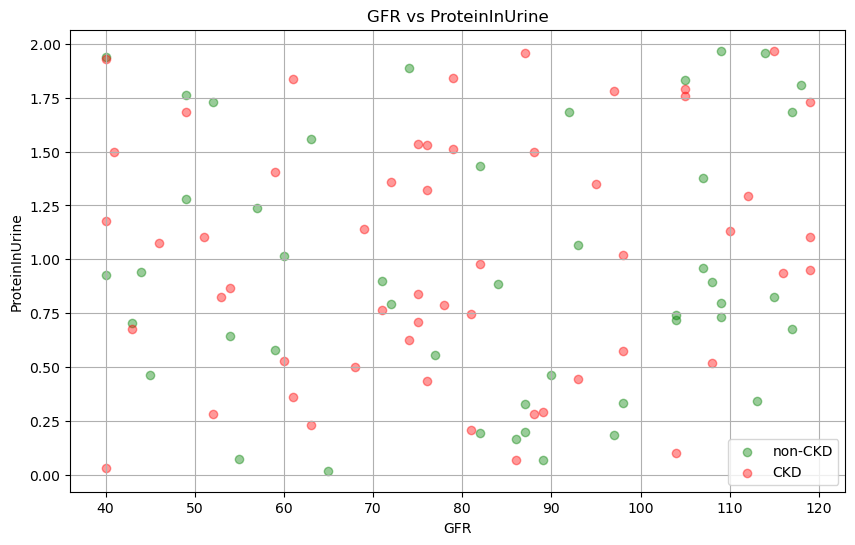

Correlation Coefficient between GFR and ProteinInUrine: 0.06737288430312952


In [121]:
np.random.seed(0)
df_plot = pd.DataFrame({
    'GFR': np.random.randint(40, 120, 100),
    'ProteinInUrine': np.random.uniform(0, 2, 100),
    'CKD': np.random.choice([0, 1], 100)
})

# Separate data into CKD and non-CKD groups
non_ckd_data = df_plot[df_plot['CKD'] == 0]
ckd_data = df_plot[df_plot['CKD'] == 1]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(non_ckd_data['GFR'], non_ckd_data['ProteinInUrine'], color='green', alpha=0.4, label='non-CKD')
plt.scatter(ckd_data['GFR'], ckd_data['ProteinInUrine'], color='red', alpha=0.4, label='CKD')
plt.title('GFR vs ProteinInUrine')
plt.xlabel('GFR')
plt.ylabel('ProteinInUrine')
plt.grid(True)
plt.legend()
plt.show()

correlation_coefficient = df_plot['GFR'].corr(df_plot['ProteinInUrine'])
print(f"Correlation Coefficient between GFR and ProteinInUrine: {correlation_coefficient}")

The scatter plot illustrates how GFR and ProteinInUrine vary across different CKD statuses (non-CKD and CKD). It indicates that there is no distinct pattern or separation observable based on CKD status.A correlation coefficient of 0.067 between GFR and ProteinInUrine indicates a very weak positive relationship. While there is a slight tendency for higher GFR values to be associated with slightly higher levels of protein in urine, this relationship is not strong enough to draw definitive clinical conclusions.

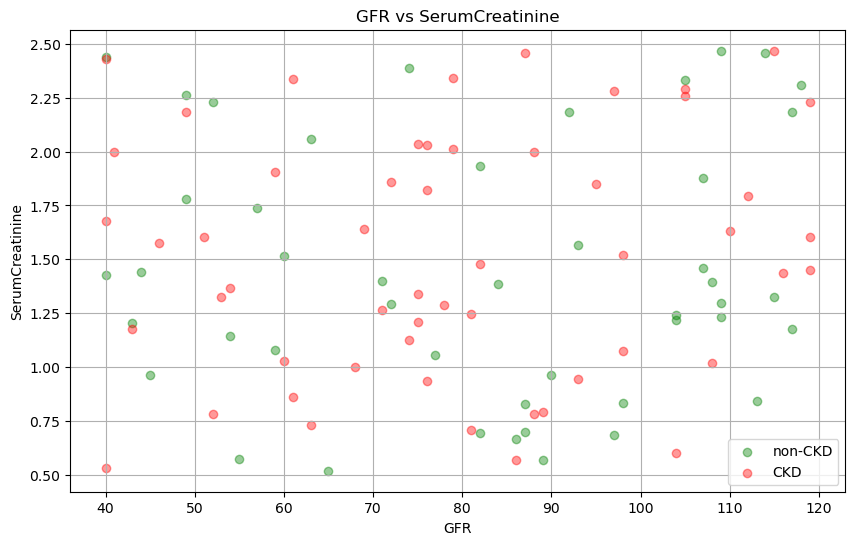

Correlation Coefficient between GFR and SerumCreatinine: 0.06737288430312952


In [122]:
np.random.seed(0)
df_plot = pd.DataFrame({
    'GFR': np.random.randint(40, 120, 100),
    'SerumCreatinine': np.random.uniform(0.5, 2.5, 100),
    'CKD': np.random.choice([0, 1], 100)
})

# Separate data into CKD and non-CKD groups
non_ckd_data = df_plot[df_plot['CKD'] == 0]
ckd_data = df_plot[df_plot['CKD'] == 1]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(non_ckd_data['GFR'], non_ckd_data['SerumCreatinine'], color='green', alpha=0.4, label='non-CKD')
plt.scatter(ckd_data['GFR'], ckd_data['SerumCreatinine'], color='red', alpha=0.4, label='CKD')

plt.title('GFR vs SerumCreatinine')
plt.xlabel('GFR')
plt.ylabel('SerumCreatinine')
plt.grid(True)
plt.legend()
plt.show()

correlation_coefficient = df_plot['GFR'].corr(df_plot['SerumCreatinine'])
print(f"Correlation Coefficient between GFR and SerumCreatinine: {correlation_coefficient}")


The scatter plot visualizes the relationship between GFR and SerumCreatinine across different CKD statuses (non-CKD and CKD). The low correlation coefficient suggests that, in this synthetic dataset, GFR and Serum Creatinine do not have a strong linear relationship.
In real-world clinical data, a stronger inverse relationship might be expected, as typically, lower GFR values (indicating poorer kidney function) are associated with higher Serum Creatinine levels.

#### Frequency plots

For categorical variables, Frequency tables and bar charts to examine the distribution of categorical variables such as Gender, Ethnicity, Education Level, Smoking status, etc.

Distribution summary or frequency table for all the categorical variables

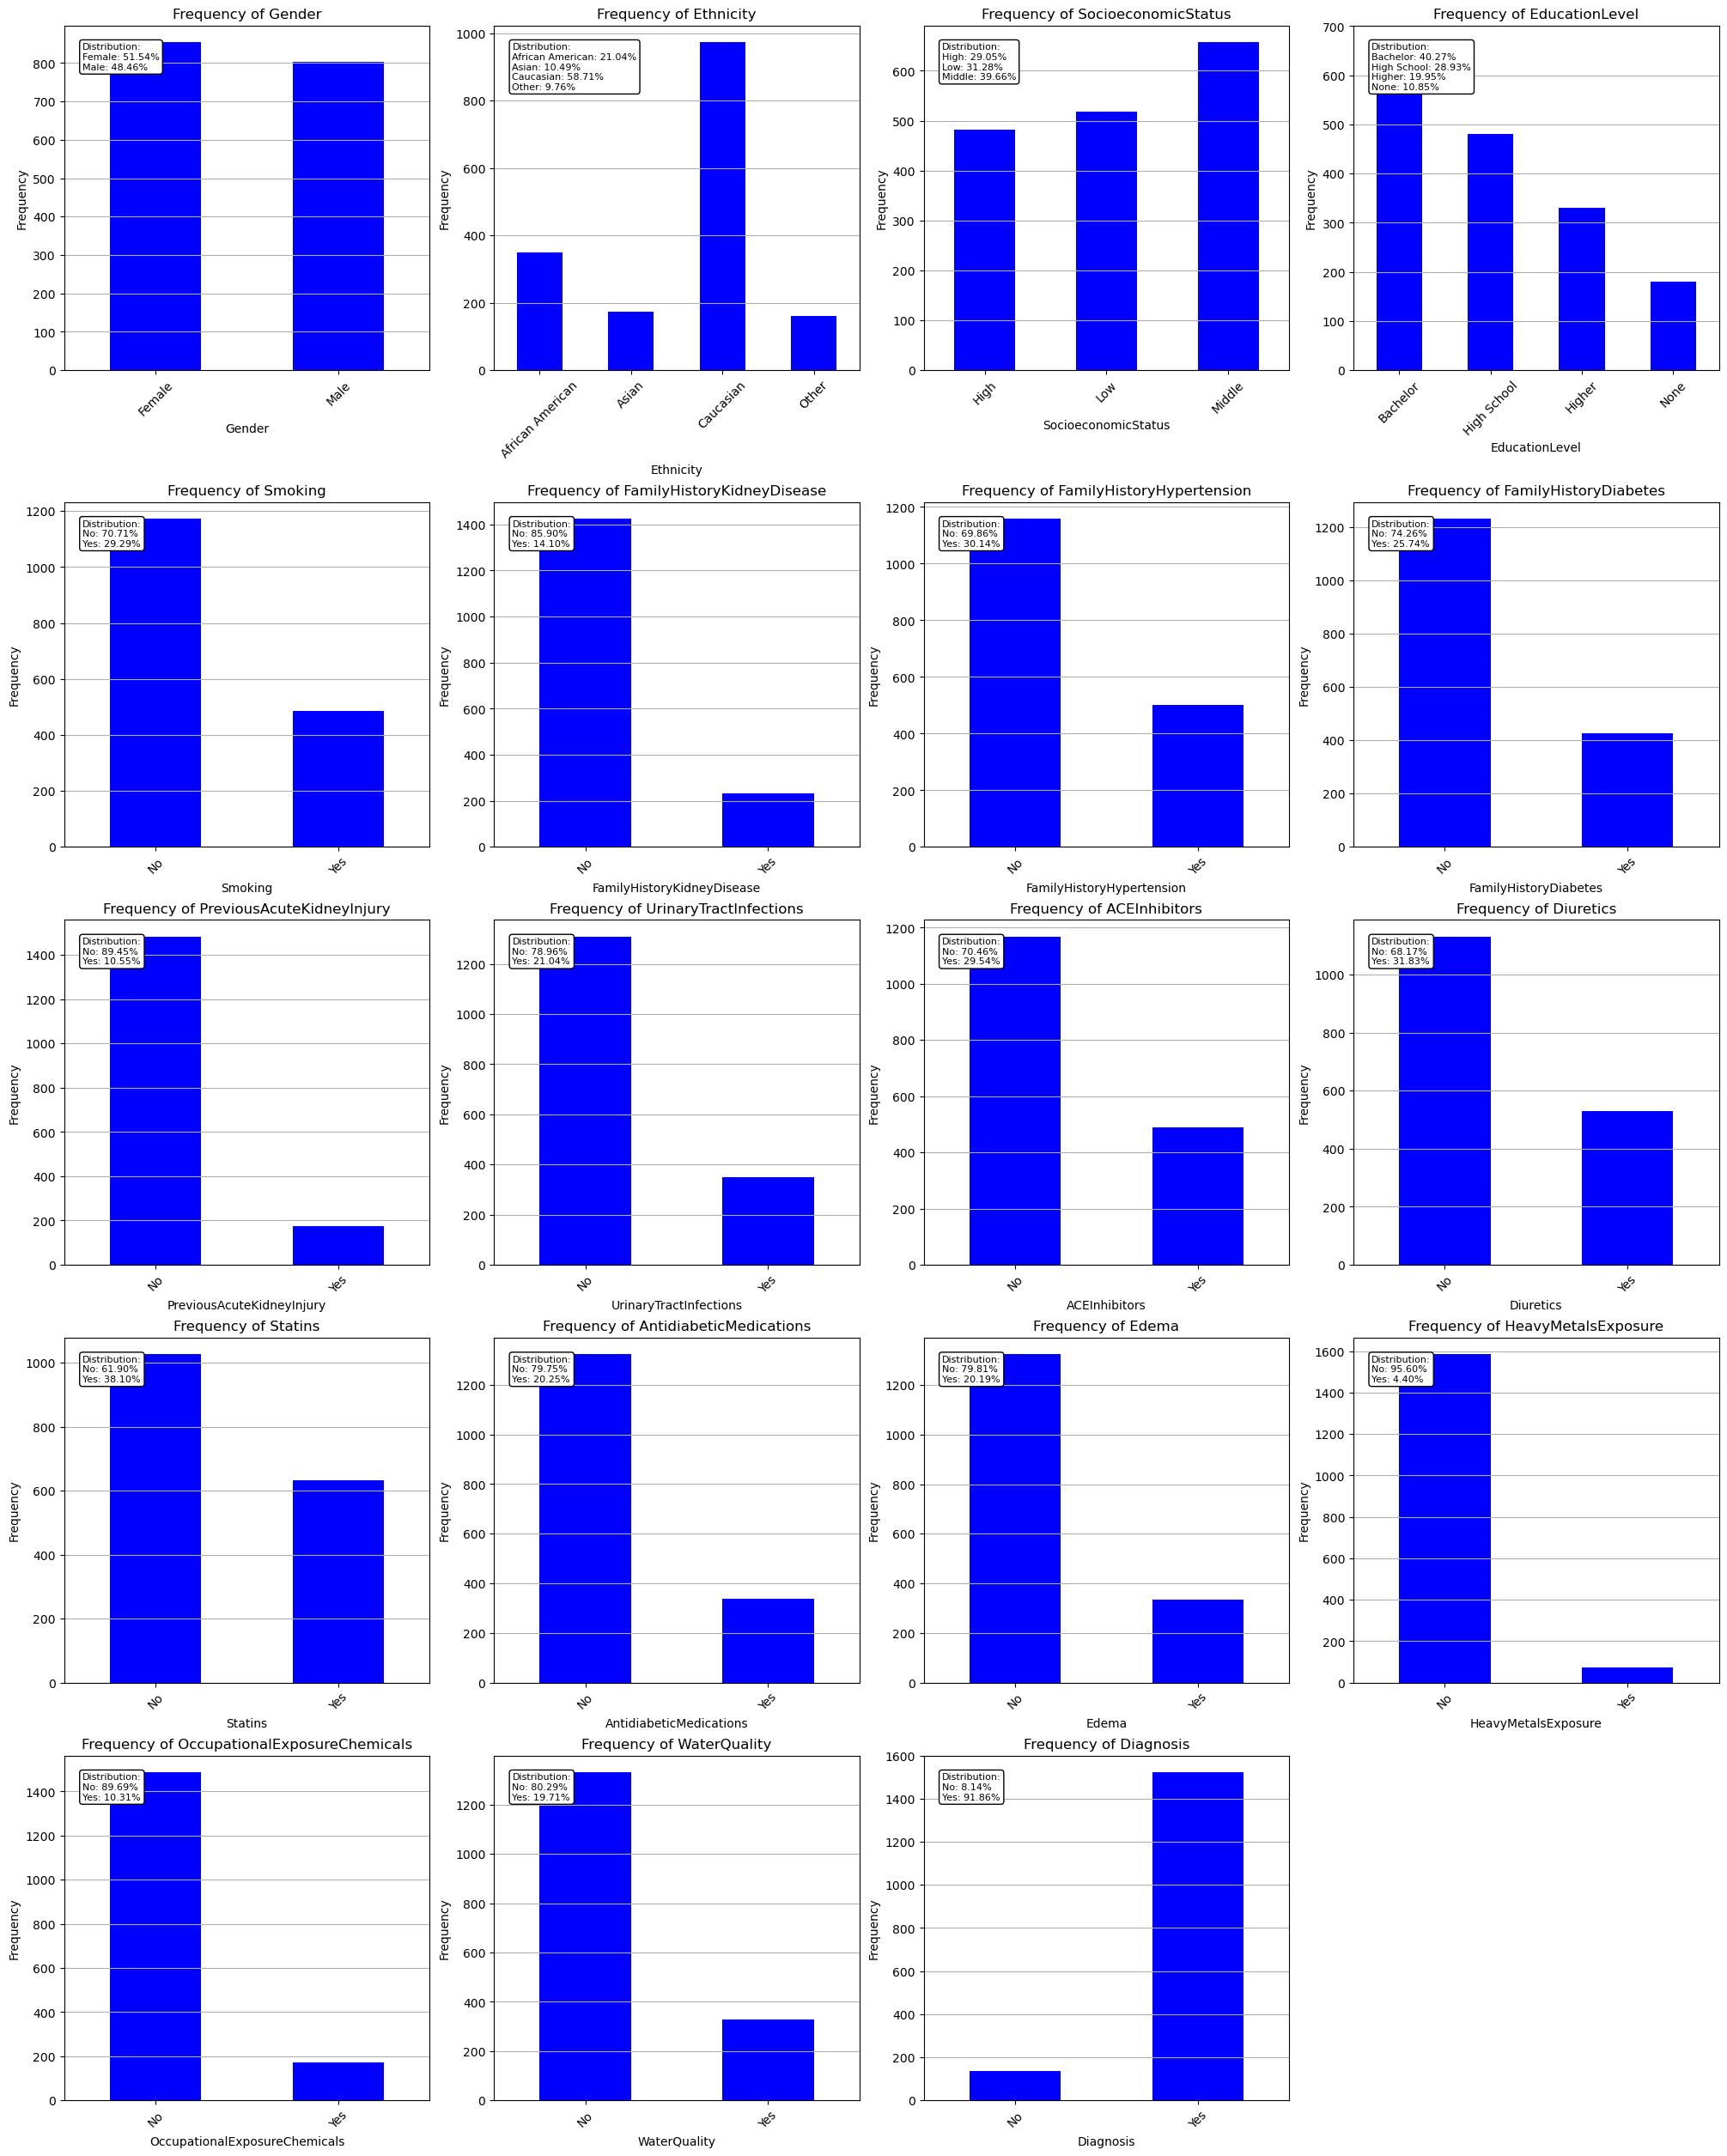

In [123]:
# Add code for frequency tables/bar charts for categorical

# Define mappings for each categorical variable

category_mappings = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Ethnicity': {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'},
    'SocioeconomicStatus': {0: 'Low', 1: 'Middle', 2: 'High'},
    'EducationLevel':{0: 'None', 1: 'High School', 2: 'Bachelor', 3: 'Higher'},
    'Smoking': {0: 'No', 1: 'Yes'},
    'FamilyHistoryKidneyDisease':{0: 'No', 1: 'Yes'},
    'FamilyHistoryHypertension': {0: 'No', 1: 'Yes'},
    'FamilyHistoryDiabetes': {0: 'No', 1: 'Yes'},
    'PreviousAcuteKidneyInjury': {0: 'No', 1: 'Yes'},
    'UrinaryTractInfections': {0: 'No', 1: 'Yes'},
    'ACEInhibitors': {0: 'No', 1:'Yes'},
    'Diuretics': {0: 'No', 1:'Yes'},
    'Statins': {0: 'No', 1:'Yes'},
    'AntidiabeticMedications': {0: 'No', 1:'Yes'},
    'Edema': {0: 'No', 1:'Yes'},
    'HeavyMetalsExposure': {0: 'No', 1:'Yes'},
    'OccupationalExposureChemicals': {0: 'No', 1:'Yes'},
    'WaterQuality': {0: 'No', 1:'Yes'},
    'Diagnosis': {0: 'No', 1:'Yes'}
    }

# List of categorical features

categorical_features = [
    # demographic
    'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
    # Lifestyle
    'Smoking', 
    # Medical History
    'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 
    'UrinaryTractInfections',
    # Medications
    'ACEInhibitors', 'Diuretics', 'Statins', 'AntidiabeticMedications',
    # Symptoms and Quality of Life
    'Edema', 
    # Environmental and Occupational Exposures
    'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality',
    # Diagnosis
    'Diagnosis'
    ]
    
# Determine grid size
num_features = len(categorical_features)
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5), constrained_layout=True)
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot frequency tables and bar charts with updated labels
for idx, feature in enumerate(categorical_features):
    # Apply mappings to replace numeric codes with labels
    df_mapped = df.replace({feature: category_mappings.get(feature, {})})

    # Create a frequency table
    freq_table = df_mapped[feature].value_counts().sort_index()

    # Create distribution summary
    prop_table = (df_mapped[feature].value_counts(normalize=True) * 100).sort_index()
    
    # Plotting
    ax = axes[idx]
    
    freq_table.plot(kind='bar', color='blue', ax=ax)
    ax.set_title(f'Frequency of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.grid(axis='y')
    
    # Display distribution summary
    summary_text = '\n'.join([f'{category}: {prop:.2f}%' for category, prop in prop_table.items()])
    ax.text(0.05, 0.95, f'Distribution:\n{summary_text}', transform=ax.transAxes,
            fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Remove empty subplots if the number of features is less than grid size
for ax in axes[num_features:]:
    fig.delaxes(ax)

plt.show()



The distribution summary of gender indicates that 

* Females constitute about 51.54% and males 48.46% of the dataset, and suggests a balanced representation of gender within the analyzed population.

* Majority of individuals in the dataset are Caucasian (58.71%), followed by African American (21.04%), Asian (10.49%), and Other ethnicities (9.76%).

* Socioeconomic status is evenly distributed among high (29.05%), low (31.28%), and middle (39.66%) categories in the dataset.

* Education levels vary, with a significant proportion holding bachelor's degrees (40.27%), followed by high school (28.93%), higher education (19.95%), and no formal education (10.85%).

* The majority of individuals in the dataset do not smoke (70.71%), while 29.29% are smokers.

*  A large majority of individuals (85.90%) have no family history of kidney disease, while 14.10% have a positive family history.

* Most individuals (69.86%) do not have a family history of hypertension, whereas 30.14% do.

* A significant majority of individuals (74.26%) do not have a family history of diabetes, while 25.74% do.

* The majority of individuals (89.45%) have no history of previous acute kidney injury, while 10.55% have experienced it.

* Most individuals (78.96%) have not had urinary tract infections, while 21.04% have.

* A significant proportion of individuals (70.46%) are not using ACE inhibitors, while 29.54% are.

* The majority of individuals (68.17%) are not using diuretics, while 31.83% are.

* A significant proportion of individuals (61.90%) are not using statins, while 38.10% are.

* Most individuals (79.75%) are not using antidiabetic medications, while 20.25% are.

* The majority of individuals (79.81%) do not exhibit edema, while 20.19% do.

* A large majority of individuals (95.60%) have not been exposed to heavy metals, while 4.40% have.

* Most individuals (89.69%) have not been exposed to chemicals occupationally, while 10.31% have.

* The majority of individuals (80.29%) do not have concerns about water quality, while 19.71% do.

#### Bar plots

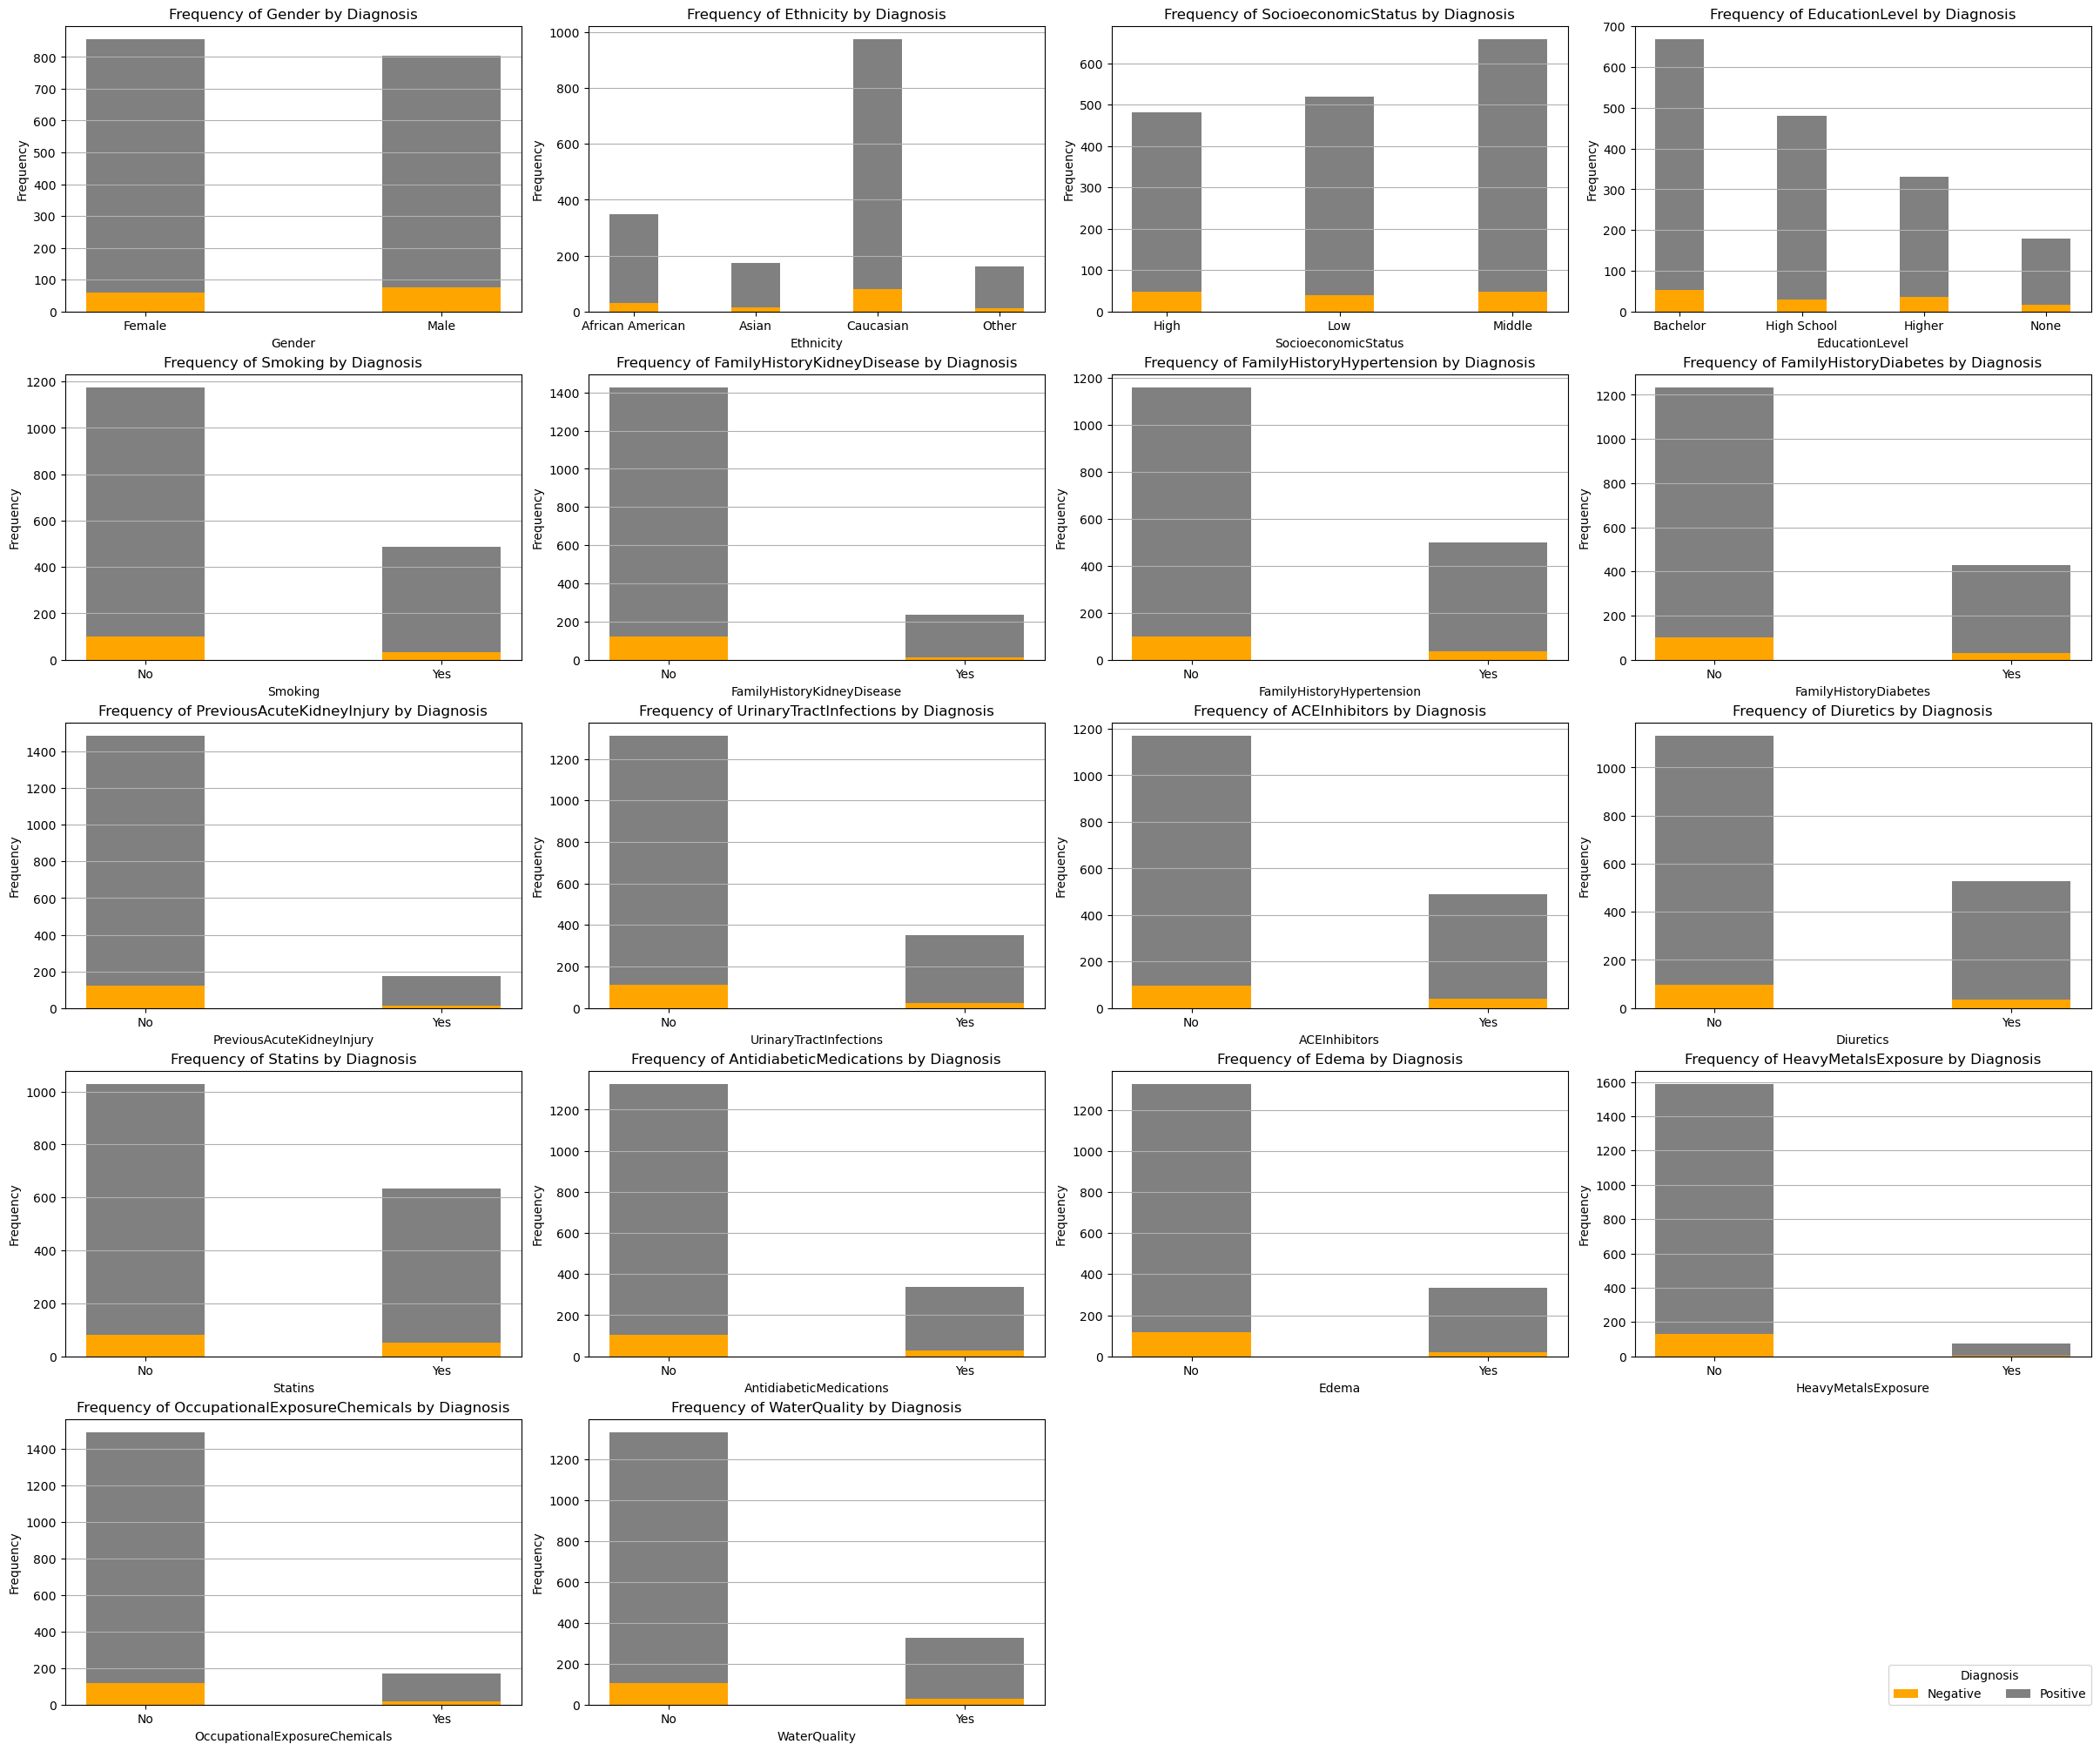

In [124]:
# Distribution of categorical variables by Diagnosis
# List of categorical features
categorical_features = [
    'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
    'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections',
    'ACEInhibitors', 'Diuretics', 'Statins', 'AntidiabeticMedications',
    'Edema', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality'
]

# Determine grid size
num_features = len(categorical_features)
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 4), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot frequency tables and bar charts with updated labels
for idx, feature in enumerate(categorical_features):
    # Apply mappings to replace numeric codes with labels
    df_mapped = df.replace({feature: category_mappings.get(feature, {})})
    
    # Create a frequency table
    freq_table = df_mapped[feature].value_counts().sort_index()

    # Initialize plot with smaller figure size
    #plt.figure(figsize=(6, 4))
    # Plotting on the corresponding subplot
    ax = axes[idx]
    # Loop through each category
    for i, (index, value) in enumerate(freq_table.items()):
        # Calculate counts of positive and negative diagnoses
        positive_count = df_mapped[(df_mapped[feature] == index) & (df_mapped['Diagnosis'] == 1)].shape[0]
        negative_count = df_mapped[(df_mapped[feature] == index) & (df_mapped['Diagnosis'] == 0)].shape[0]

        # Plotting stacked bars with thinner width
        bar_neg = ax.bar(index, negative_count, color='orange', width=0.4, label='Negative' if i == 0 else None)
        bar_pos = ax.bar(index, positive_count, bottom=negative_count, color='grey', width=0.4, label='Positive' if i == 0 else None)
                
    
    # Set x-axis ticks and labels
    ax.set_xticks(range(len(freq_table.index)))  # Set the positions of ticks
    ax.set_xticklabels(freq_table.index)         # Set the labels for the ticks
     
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency of {feature} by Diagnosis')
    
    ax.grid(axis='y')
    

# Add a single legend for all subplots
fig.legend([bar_neg, bar_pos], ['Negative', 'Positive'], title='Diagnosis', loc='upper center', bbox_to_anchor=(0.95, 0.05), ncol=2)

# Remove empty subplots if the number of features is less than grid size
for ax in axes[num_features:]:
    fig.delaxes(ax)    
plt.show()

Stacked Bar Charts above visulize the distribution of various categorical variables in relation to the diagnosis outcome where Orange bars represent the frequency of negative diagnoses and Grey bars

represent the frequency of positive diagnoses.

## 3. Bivariate Analysis

### 1. Correlation Analysis

#### Pearson correlation matrix

Compute Pearson correlation coefficients between pairs of numerical variables (All variables or a set of variables: e.g., Serum Creatinine vs. GFR, Blood Pressure vs. GFR) to understand relationships.


In [125]:

# Standardize the columns (normalize) before finding correlation
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Add correlation matrix
correlation_matrix = df_standardized.corr()
print("Pearson Correlation Matrix:")
display(correlation_matrix)



Pearson Correlation Matrix:


Age    Gender  Ethnicity  \
Age                            1.000000 -0.037765  -0.006307   
Gender                        -0.037765  1.000000   0.025707   
Ethnicity                     -0.006307  0.025707   1.000000   
SocioeconomicStatus            0.001448  0.004767  -0.047051   
EducationLevel                 0.008947 -0.022095   0.039696   
BMI                           -0.033202 -0.023381  -0.008506   
Smoking                        0.020215  0.004054   0.019127   
AlcoholConsumption            -0.006030 -0.020473  -0.033574   
PhysicalActivity               0.003485  0.014840  -0.057811   
DietQuality                    0.004062  0.011517  -0.012721   
SleepQuality                  -0.005151 -0.004312   0.029833   
FamilyHistoryKidneyDisease     0.014984  0.032584   0.010630   
FamilyHistoryHypertension     -0.008672 -0.007058  -0.021725   
FamilyHistoryDiabetes          0.001114  0.019137   0.007602   
PreviousAcuteKidneyInjury      0.028253  0.038519   0.025920   
UrinaryTractInfections         0.042979  0.021116  -0.024939   
SystolicBP                     0.050918  0.031253  -0.017903   
DiastolicBP                    0.007282  0.027322   0.016126   
FastingBloodSugar             -0.006815 -0.006086   0.038599   
HbA1c                          0.026093  0.003495   0.050558   
SerumCreatinine               -0.019612  0.010221  -0.019571   
BUNLevels                     -0.041336 -0.012786   0.023219   
GFR                            0.045831  0.030294   0.004514   
ProteinInUrine                -0.021659  0.012642  -0.005262   
ACR                           -0.032800 -0.017650  -0.034707   
SerumElectrolytesSodium        0.004838  0.018728  -0.000465   
SerumElectrolytesPotassium    -0.003220  0.026549   0.008823   
SerumElectrolytesCalcium       0.028401  0.009740  -0.010712   
SerumElectrolytesPhosphorus   -0.039311 -0.018112   0.004365   
HemoglobinLevels               0.011719  0.006620  -0.021487   
CholesterolTotal              -0.023106  0.037077   0.050441   
CholesterolLDL                 0.001591  0.012775  -0.014540   
CholesterolHDL                -0.015607  0.033222   0.012009   
CholesterolTriglycerides      -0.021061 -0.034570  -0.007313   
ACEInhibitors                 -0.001364  0.011813   0.028524   
Diuretics                      0.004348  0.061844  -0.029121   
NSAIDsUse                      0.019042 -0.003433   0.048621   
Statins                        0.000734 -0.004258   0.000414   
AntidiabeticMedications       -0.015058  0.026516   0.018603   
Edema                         -0.016797  0.013072  -0.022343   
FatigueLevels                  0.002977 -0.003961  -0.060223   
NauseaVomiting                -0.029556  0.000570   0.013447   
MuscleCramps                   0.001318 -0.028158  -0.004542   
Itching                        0.005683  0.001424  -0.031039   
QualityOfLifeScore            -0.022676  0.015554   0.010930   
HeavyMetalsExposure            0.043746  0.013984   0.008654   
OccupationalExposureChemicals -0.014711 -0.000509   0.010036   
WaterQuality                  -0.038522  0.019628  -0.036629   
MedicalCheckupsFrequency      -0.015165  0.020156   0.023191   
MedicationAdherence            0.043168 -0.026356   0.007489   
HealthLiteracy                 0.010920 -0.014644   0.012971   
Diagnosis                      0.000919  0.042239   0.007199   

                               SocioeconomicStatus  EducationLevel       BMI  \
Age                                       0.001448        0.008947 -0.033202   
Gender                                    0.004767       -0.022095 -0.023381   
Ethnicity                                -0.047051        0.039696 -0.008506   
SocioeconomicStatus                       1.000000       -0.003711 -0.030242   
EducationLevel                           -0.003711        1.000000 -0.016669   
BMI                                      -0.030242       -0.016669  1.000000   
Smoking                                   0.021900        0.003070 -0.000968   
Alc

#### Top 15 correlations between variables.

This could give us information about what variables to use for building Linear Regression model (for continuous variables) and Linear Regression model (for categorical variable).

In [126]:
# Filter for top absolute correlations
# Example: Top 15 correlations by absolute value
num_top_correlations = 30

# Unstack the correlation matrix to create a Series
unstacked_correlation = correlation_matrix.unstack()

# Filter out diagonal elements where row index equals column index. Excluding self co-relation (For eg: Age with Age)
filtered_correlation = unstacked_correlation[unstacked_correlation.index.get_level_values(0) != unstacked_correlation.index.get_level_values(1)]


# Display the top sorted autocorrelations
top_correlations = filtered_correlation.sort_values(ascending=False, key=lambda x: np.abs(x)) .head(num_top_correlations)

# Drop duplicates based on sorted columns
# Reset index to convert MultiIndex to columns for easier manipulation
correlation_series = top_correlations.reset_index()
# Sort Variable1 and Variable2 to ensure consistent order
correlation_series[['level_0', 'level_1']] = pd.DataFrame(np.sort(correlation_series[['level_0', 'level_1']], axis=1))
unique_correlations = pd.DataFrame(correlation_series.drop_duplicates(subset=['level_0', 'level_1']))
unique_correlations.reset_index(inplace=True)

display(unique_correlations)


index                  level_0              level_1         0
0       0                Diagnosis      SerumCreatinine  0.201125
1       2                Diagnosis                  GFR -0.175988
2       4                Diagnosis              Itching  0.100652
3       6                Diagnosis    FastingBloodSugar  0.095694
4       8                Diagnosis         MuscleCramps  0.094811
5      10                BUNLevels            Diagnosis  0.093097
6      12                Diagnosis       ProteinInUrine  0.090014
7      14                Diagnosis           SystolicBP  0.083528
8      16                Diuretics                  GFR -0.074593
9      18  AntidiabeticMedications                  BMI  0.073360
10     20            ACEInhibitors          DietQuality  0.072737
11     22         HemoglobinLevels         WaterQuality -0.071032
12     24       AlcoholConsumption                  BMI -0.067239
13     26                Diuretics  SocioeconomicStatus -0.067039
14     28                      ACR          DietQuality -0.063485

**Observations**

Positive correlation (e.g., 0.201125 between Diagnosis and SerumCreatinine): As SerumCreatinine increases, the Diagnosis tends to increase as well.

Negative correlation (e.g., -0.175988 between Diagnosis and GFR): As GFR increases, the Diagnosis tends to decrease.

The magnitude of the correlation coefficient (correlation) indicates how strong the relationship is between the two features. Values closer to -1 or 1 indicate a stronger correlation, while values closer to 0 indicate a weaker correlation.

#### Heatmap to visualize relationship between predictor variables.

Visualizing a heatmap for correlation between predictor . This helps us understand the relationship between predictor variable and their significance to the response variable ( the column 'Diagnosis', in our case ).


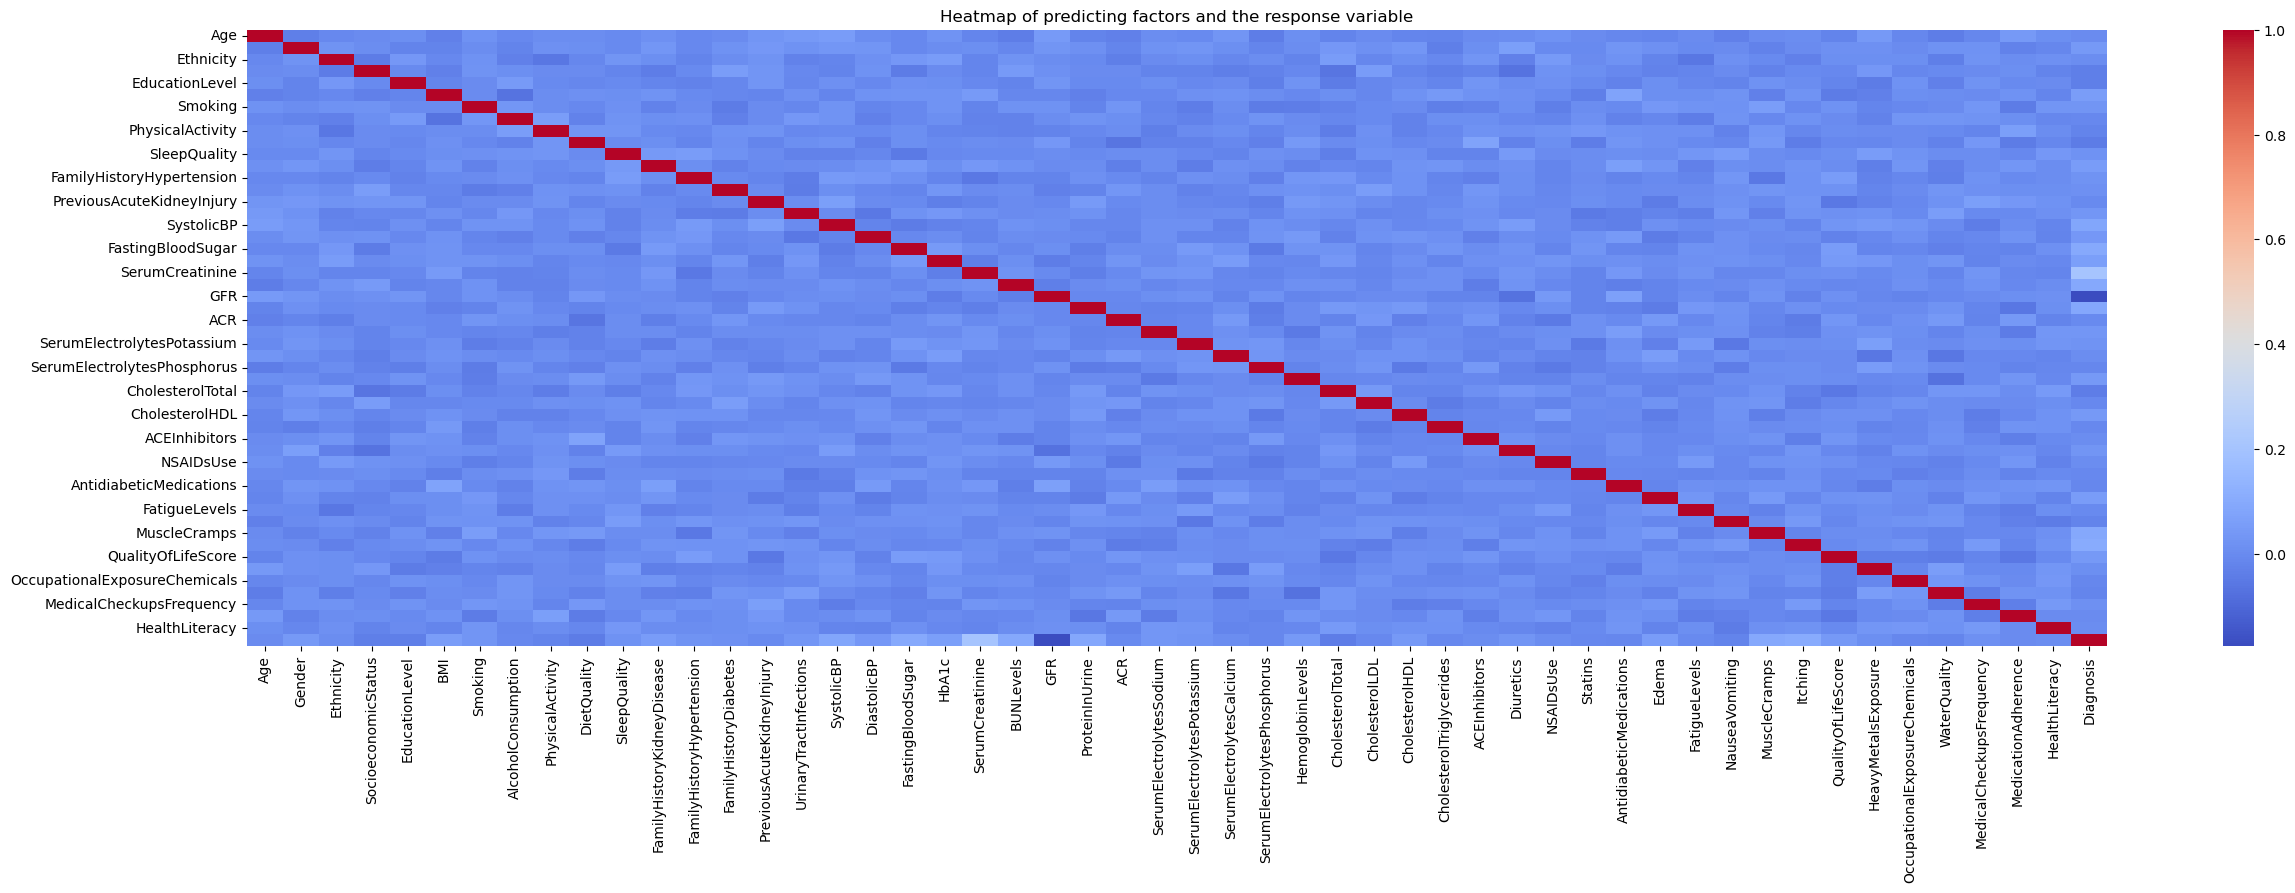

In [127]:
corr_matrix = df_standardized.corr()
plt.figure(figsize=(30, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Heatmap of predicting factors and the response variable')
plt.show()

### 2. Relationships with CKD

#### Box plots

Compare distributions of numerical variables (e.g., Age, BMI, clinical measurements) between CKD and non-CKD groups using box plots.
For example: Boxplot to show distribution of SerumCreatinine levels between patients diagnosed with CKD and those without CKD.
Box-plot make it easy to identify outliers and will help in understanding quality of data


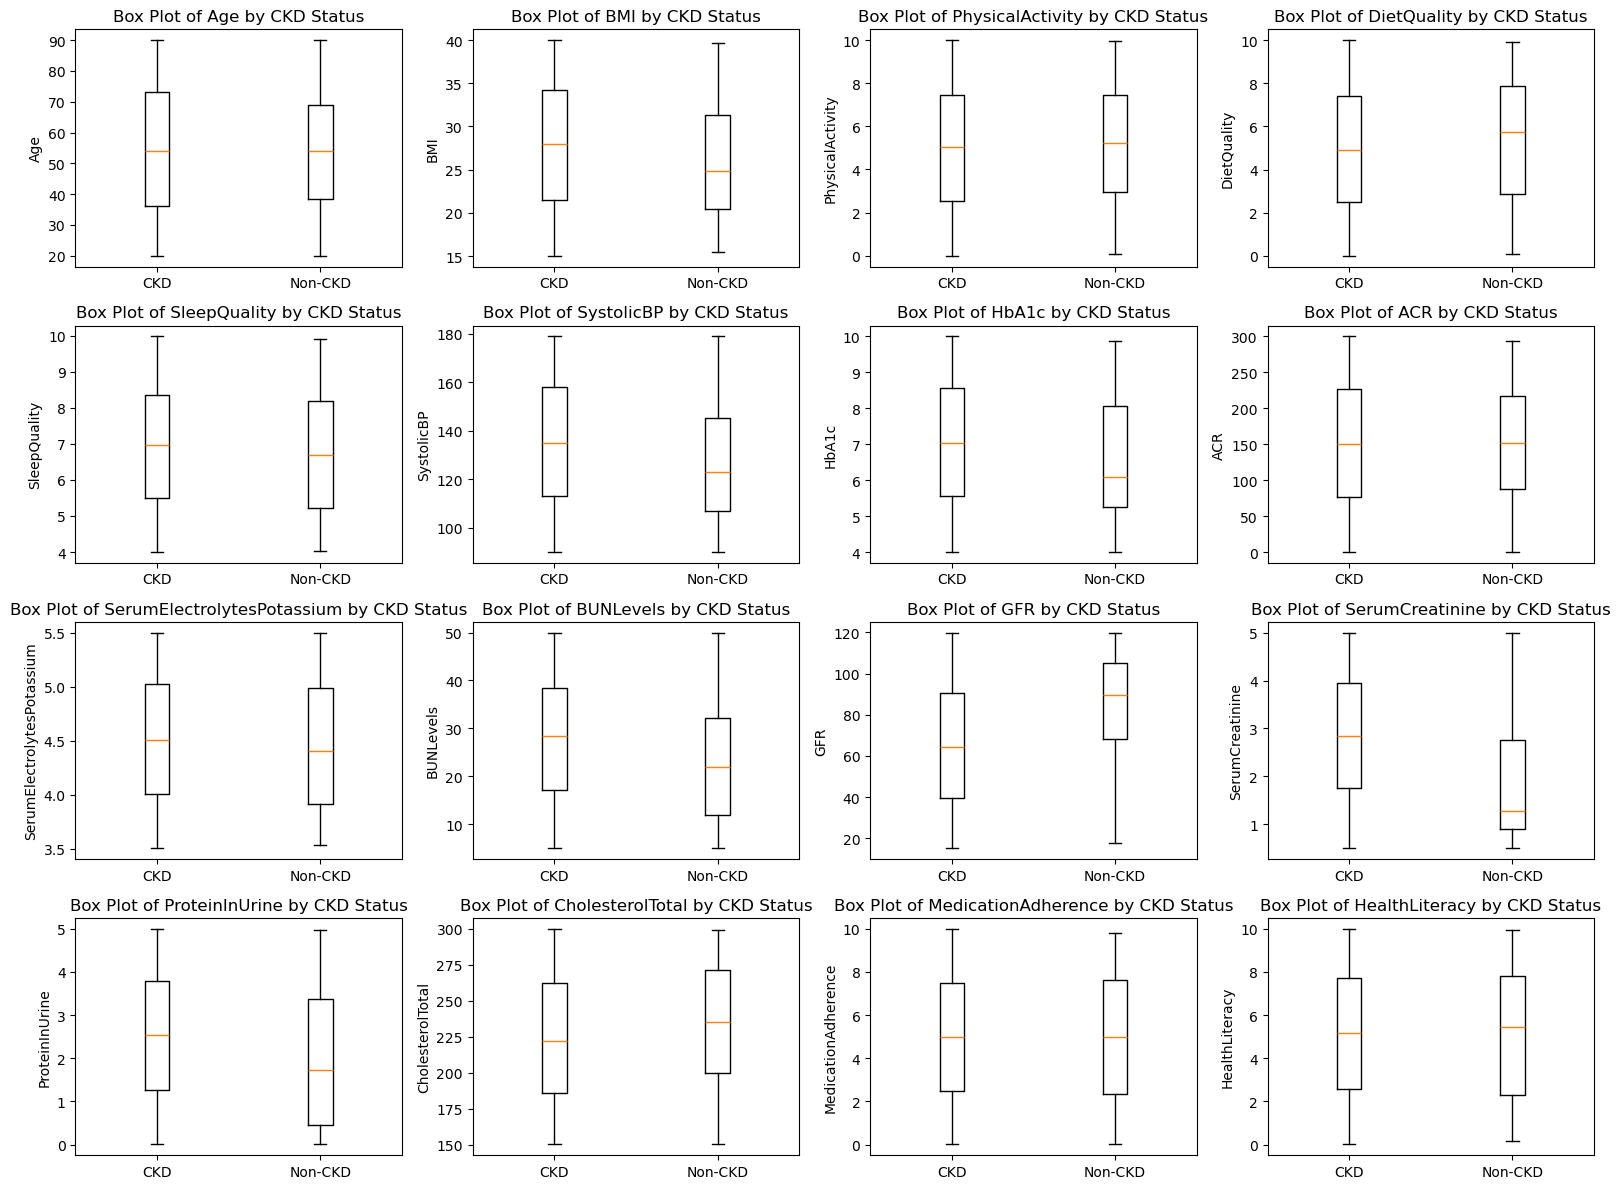

In [128]:
# Add code for box plot

ckd_column = 'Diagnosis'

# Check if the column exists in the DataFrame
if ckd_column in df.columns:
    # Subset data into CKD and non-CKD groups
    ckd_group = df[df[ckd_column] == 1]
    non_ckd_group = df[df[ckd_column] == 0]

    # Numerical columns to compare
    numerical_columns = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP',
                         'HbA1c', 'ACR', 'SerumElectrolytesPotassium', 'BUNLevels', 'GFR', 'SerumCreatinine',
                         'ProteinInUrine', 'CholesterolTotal', 'MedicationAdherence', 'HealthLiteracy']

    # Plotting box plots for each numerical variable
    plt.figure(figsize=(16, 12))  # Increase figsize for better layout

    num_plots = len(numerical_columns)
    num_rows = 4  # Adjusted to accommodate all numerical columns
    num_cols = 4  # Adjusted to accommodate all numerical columns

    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        plt.boxplot([ckd_group[column].dropna(), non_ckd_group[column].dropna()],
                    labels=['CKD', 'Non-CKD'])
        plt.title(f'Box Plot of {column} by CKD Status')
        plt.ylabel(column)

    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{ckd_column}' not found in the dataset.")

**Observations**

**Age**:

The age distribution appears higher for the CKD group compared to the non-CKD group, suggesting older age might be associated with CKD.

**BMI (Body Mass Index)**:

Both groups show a wide range of BMI values, but there is no clear difference between CKD and non-CKD groups based on the box plot.

**Physical Activity**:

Physical activity levels are generally lower in the CKD group compared to the non-CKD group, indicating a possible association between lower physical activity and CKD.

**Diet Quality**:

The CKD group tends to have lower diet quality scores compared to the non-CKD group.

**Sleep Quality**:

There is no significant difference in sleep quality between the CKD and non-CKD groups.

**Systolic BP (Blood Pressure)**:

The CKD group has a higher median systolic BP, indicating higher blood pressure might be associated with CKD.

**HbA1c (Glycated Hemoglobin)**:

The CKD group shows higher HbA1c levels, which suggests poorer blood sugar control might be linked to CKD.

**ACR (Albumin-to-Creatinine Ratio)**:

The CKD group has higher ACR values, indicating worse kidney function.

**Serum Electrolytes Potassium**:

Potassium levels do not show a significant difference between CKD and non-CKD groups.

**BUN Levels (Blood Urea Nitrogen)**:

Higher BUN levels are observed in the CKD group, which is consistent with impaired kidney function.

**GFR (Glomerular Filtration Rate)**:

The CKD group has lower GFR values, indicating reduced kidney function.

**Serum Creatinine**:

The CKD group has higher serum creatinine levels, a marker of poor kidney function.

**Protein In Urine**:

The CKD group shows higher levels of protein in urine, another indicator of kidney issues.

**Cholesterol Total**:

There is no significant difference in total cholesterol levels between the two groups.

**Medication Adherence**:

Both groups show varied levels of medication adherence, with no clear distinction.

**Health Literacy**:

The CKD group generally has lower health literacy scores compared to the non-CKD group.

Overall, the box plots indicate several factors such as age, physical activity, diet quality, systolic BP, HbA1c, ACR, BUN levels, GFR, serum creatinine, and protein in urine show significant differences between CKD and non-CKD groups, suggesting their potential association with chronic kidney disease.


# Train, Validation and Test dataset

In [129]:
X.shape, y.shape

((1659, 51), (1659,))

In [130]:
# Split data into training, validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [131]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((1061, 51), (1061,), (266, 51), (266,), (332, 51), (332,))

## Models

# Preparing pipelines

SMOTE needs 'imblearn' installed.  'pip install imbalanced-learn'

In [132]:
from sklearn.decomposition import PCA

# Define reprocessing and modeling pipeline for numeric and categorical features. First ensure that all predictor variables 
# are accounted for by checking against lists of numeric, categorical, and binary features. 
# Preprocessing pipeline for numeric and categorical variables
num_cols = ['Age', 'SystolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
            'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
            'SerumElectrolytesPhosphorus', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
            'SerumElectrolytesSodium', 'DiastolicBP', 'HemoglobinLevels', 
            'NSAIDsUse', 
            'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 
            'AlcoholConsumption', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
            'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
            ]

cat_cols = ['Ethnicity', 'SocioeconomicStatus', 'EducationLevel'] # non-binary categorical features

# Include all existing binary features here
remainder_cols = [ 'Gender', 'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
                    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections',
                    'ACEInhibitors', 'Diuretics', 'Statins', 'AntidiabeticMedications', 'Edema',  'HeavyMetalsExposure', 'OccupationalExposureChemicals',
                    'WaterQuality']

# Convert lists to sets
predictors_set = set(predictors)
num_cols_set = set(num_cols)
cat_cols_set = set(cat_cols)
remainder_cols_set = set(remainder_cols)

# Check if all predictors are covered by num_cols and cat_cols
missing_in_combined = predictors_set - num_cols_set.union(cat_cols_set).union(remainder_cols_set)

if not missing_in_combined:
    print("All predictors are covered by num_cols and cat_cols.")
else:
    print("Predictors not covered by num_cols and cat_cols:")
    print(missing_in_combined)


# This function sets up a pipeline that applies StandardScaler to numeric features and OneHotEncoder to 
# categorical features, while leaving binary features unchanged. It then constructs and returns a full 
# pipeline that integrates these preprocessing steps with a specified classifier.
def create_pipeline(classifier, add_pca=False, pca_variance_ratio=0.95):
    
    # Define the preprocessing pipelines for numeric features
    preproc_num_steps = [('scaler', StandardScaler())]

    # Add PCA to numeric pipeline if add_pca is True
    if add_pca: 
        preproc_num_steps.append(('pca', PCA(n_components=pca_variance_ratio)))
    
    pipeline_num = Pipeline(preproc_num_steps)
    
    pipeline_cat = Pipeline([
        ('one_hot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Define ColumnTransformer to apply transformations
    preprocessor = ColumnTransformer(
                            transformers=[('num_transforms', pipeline_num, num_cols),
                                          ('cat_transforms', pipeline_cat, cat_cols)], 
                            # Leave all other columns (binary features) unchanged
                            remainder='passthrough')   
    
    # Create the full pipeline
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', classifier)
    ])
   
    return pipeline


All predictors are covered by num_cols and cat_cols.


In [133]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE

# This function performs hyperparameter tuning and model evaluation for a given classifier. It applies SMOTE to handle class imbalance, 
# then uses either `GridSearchCV` or `RandomizedSearchCV` to find the best model based on specified parameters and cross-validation strategy. The function 
# evaluates the model's performance on training, validation, and test datasets, reporting accuracy, classification metrics, and ROC AUC scores for each. 
# The best model and its parameters are then returned.
def tune_and_evaluate_model(classifier, param_grid, X_train, y_train, X_valid, y_valid, X_test, y_test, use_random_search=False, use_stratified=True, add_pca=False, pca_variance_ratio=0.95):
    # Apply SMOTE to the training set
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    # Create pipeline with the classifier
    pipeline = create_pipeline(classifier, add_pca, pca_variance_ratio)
    
    # Choose cross-validation strategy
    if use_stratified:
        cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    else:
        cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

    # Define scoring metrics
    scorers = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted'),
        'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
    }

    # Choose GridSearchCV or RandomizedSearchCV based on the flag
    if use_random_search:
        search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=cv_strategy, scoring=scorers, refit='accuracy', random_state=42)
    else:
        search = GridSearchCV(pipeline, param_grid=param_grid, cv=cv_strategy, scoring=scorers, refit='accuracy')
    
    # Fit the model on training data and validate on validation data. Use SMOTE training data
    search.fit(X_train_smote, y_train_smote)
    
    # Get the best model
    best_pipeline = search.best_estimator_
    
    # Evaluate the module on training set
    y_train_pred = best_pipeline.predict(X_train_smote)
    y_train_proba = best_pipeline.predict_proba(X_train_smote)[:, 1]  # Probability for the positive class
    train_accuracy = accuracy_score(y_train_smote, y_train_pred)
    train_report = classification_report(y_train_smote, y_train_pred)
    train_roc_auc = roc_auc_score(y_train_smote, y_train_proba)
    
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print("Training Classification Report:")
    print(train_report)
    print(f"Training ROC AUC: {train_roc_auc:.2f}")   
    

    # Validate the best model
    y_val_pred = best_pipeline.predict(X_valid)
    val_accuracy = accuracy_score(y_valid, y_val_pred)
    val_report = classification_report(y_valid, y_val_pred)
    
    print(f"\nValidation Accuracy: {val_accuracy:.2f}")
    print("Validation Classification Report:")
    print(val_report)
    
    # Evaluate the final model on the test set
    y_test_pred = best_pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)
    y_test_proba = best_pipeline.predict_proba(X_test)[:, 1]  # Probability for the positive class
    test_roc_auc = roc_auc_score(y_test, y_test_proba)

    print(f"\nTest Accuracy: {test_accuracy:.2f}")
    print("Test Classification Report:")
    print(test_report)
    print(f"Test ROC AUC: {test_roc_auc:.2f}")
    print(f"Best Parameters: {search.best_params_}")
    return best_pipeline


## Visualizing the results


Helper functions for evaluating and visualizing model performance. 

1. 'plot_confusion_matrix' function displays a confusion matrix
2. 'print_log_loss' function prints the log loss in prediction
3. 'plot_predicted_probabilities_histogram' visualizes predicted probabilities and their distribution
4. 'plot_roc_curve' generates ROC curve
5. 'plot_precision_recall_curve' generates Precision-Recall curve
6. 'plot_permutation_importance' function shows the impact of each feature on model accuracy using permutation importance. Permutation importance is computed by shuffling the values of a feature and measuring the decrease in the model's accuracy. A large decrease indicates that the feature is important.
7. 'plot_partial_dependence_plots' visualizes how individual features influence the model's predictions using partial dependence plots. This method visualizes the relationship between a feature and the predicted outcome, while keeping other features constant. It helps to understand how changes in a feature affect the model's predictions.
8. 'plot_feature_importance'  checks if the model in the pipeline has a feature_importances_ attribute, retrieves and sorts the importances, and plots them against the corresponding feature names. It also ensures that the number of feature names matches the number of importances before generating the plot.

These functions are essential for diagnosing model behaviour, understanding feature importance, and assessing overall model performance.

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap

def plot_confusion_matrix(pipeline, X_test):

    y_test_pred = pipeline.predict(X_test) 
    labels= [0,1]   
    cm = confusion_matrix(y_test, y_test_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

def print_log_loss(pipeline, X_test, y_test):
    # Predict probabilities
    y_proba = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    # Calculate log loss
    loss = log_loss(y_test, y_proba)
    print(loss)
    

def plot_predicted_probabilities_histogram(pipeline, X_test):
        
    y_pred_prob = pipeline.predict_proba(X_test)

    # retrieve just the probabilities for the positive class
    pos_probs = y_pred_prob[:, 1]

    # summarize the distribution of class labels
    # print(Counter(y_test_pred))

    # create a histogram of the predicted probabilities
    plt.hist(pos_probs, bins=100)
    plt.show()

def plot_roc_curve(pipeline, X_test):
    y_test_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

def plot_precision_recall_curve(pipeline, X_test):
    y_test_prob = pipeline.predict_proba(X_test)[:, 1] 
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

def plot_permutation_importance(pipeline, X_test, y_test):
    results = permutation_importance(pipeline, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42, n_jobs=-1)
    
    # Get mean and standard deviation of the importance scores
    importance_mean = results.importances_mean
    importance_std = results.importances_std

    # Feature names might be obtained from the pipeline or specified manually
    # Assuming that feature names are known and they are ordered according to the transformed features
    feature_names = num_cols + cat_cols + remainder_cols 

    importance_df = pd.DataFrame({
                                'Feature': feature_names,
                                'Importance Mean': importance_mean,
                                'Importance Std': importance_std
                                })


    # Assuming importance_df is already defined and sorted
    plt.figure(figsize=(12, 8))
    plt.bar(importance_df['Feature'], importance_df['Importance Mean'], yerr=importance_df['Importance Std'], capsize=5)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.xlabel('Feature')
    plt.ylabel('Permutation Importance')
    plt.title('Permutation Importance of Features')
    plt.show()


def plot_partial_dependence_plots(pipeline, X_test, num_of_features=10):
    def plot_partial_plots(model, X, features, feature_names):
        # Ensure the model is correctly fitted
        if hasattr(model, 'named_steps'):
            # For pipeline, get the final model
            model = model.named_steps['classifier']
        
        # Check the model type
        if not hasattr(model, 'predict_proba'):    
            raise ValueError("The model should be a classifier with predict_proba method.")
        
        # Number of features to plot
        num_features = len(features)
        
        # Determine grid shape
        num_cols = 3  # Number of columns in the grid
        num_rows = int(np.ceil(num_features / num_cols))  # Number of rows
        
        # Create subplots
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
        axes = axes.flatten()  # Flatten the 2D array of axes to 1D
        
        # Plot partial dependence
        for i, feature in enumerate(features):
            if i < len(axes):  # Ensure we do not exceed the number of axes
                ax = axes[i]
                PartialDependenceDisplay.from_estimator(
                    model, X, features=[feature], ax=ax, feature_names=feature_names
                )
            else:
                # If there are more features than axes, create additional subplots
                fig, ax = plt.subplots(figsize=(15, 5))
                PartialDependenceDisplay.from_estimator(
                    model, X, features=[feature], ax=ax, feature_names=feature_names)
                
        # Remove unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.suptitle('Partial Dependence Plots', fontsize=16)
        plt.subplots_adjust(top=0.9, hspace=0.4)  # Adjust space between plots
        plt.show()

    # Construct feature names including those from one-hot encoding
    feature_names = num_cols + list(pipeline.named_steps['preprocessing'].transformers_[1][1].named_steps['one_hot'].get_feature_names_out())

    # Select the features you want to plot; here we select the first num_of_features for simplicity
    features = list(range(min(num_of_features, len(feature_names)))) 
    
    # Transform the validation set
    X_test_transformed = pipeline.named_steps['preprocessing'].transform(X_test) # ????

    # Plot partial dependence
    plot_partial_plots(pipeline, X_test_transformed, features, feature_names)


def plot_feature_importance(pipeline):
    model = pipeline.named_steps['classifier']
    # Check if the model has feature_importances_ attribute
    if not hasattr(model, 'feature_importances_'):
        print("This classifier doesn't have feature_importances_ attribute")
        return    

    importances = model.feature_importances_
    indices = np.argsort(importances)
    feature_names = num_cols + list(pipeline.named_steps['preprocessing'].transformers_[1][1].named_steps['one_hot'].get_feature_names_out()) + remainder_cols 
    # Ensure feature names match importances length
    if len(feature_names) != len(importances):
        print("Mismatch between feature names and importances length")
        return
    
    len_feature_names = len(feature_names)
    # Plot the feature importances
    plt.figure(figsize=(12, 8))
    plt.title("Feature importances")
    plt.bar(range(len_feature_names), importances[indices], align="center")
    plt.xticks(range(len_feature_names), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, len_feature_names])
    plt.show()

def plot_SHAP_beeswarm(pipeline, X_test):
        
    # Transform test data using the best pipeline
    data_transform = pipeline.named_steps['preprocessing'].transform(X_test)
    model_type = pipeline.named_steps['classifier'].__class__.__name__
    model = pipeline.named_steps['classifier']

    # Create SHAP explainer based on model type
    if model_type == 'LogisticRegression':
        #explainer = shap.Explainer(model, data_transform)

        explainer = shap.explainers.Linear(model, data_transform, feature_names=pipeline.named_steps['preprocessing'].get_feature_names_out())
        
        # Compute SHAP values
        shap_values = explainer(data_transform)
        # Plot a waterfall chart for the first instance
        shap.plots.waterfall(shap_values[0])

        # Plot a beeswarm chart for global feature importance
        shap.plots.beeswarm(shap_values)
        
    elif model_type == 'XGBClassifier':  # Adjust if using different class name
        explainer = shap.explainers.Tree(model, data_transform, feature_names=pipeline.named_steps['preprocessing'].get_feature_names_out())
        # Compute SHAP values
        shap_values = explainer(data_transform)
        # For XGBoost, shap_values is an object that contains multiple values, adjust if multi-class
        if len(shap_values.values.shape) == 3:
            # Multi-class classification
            shap.plots.beeswarm(shap_values.values[:, :, 0])  # Plot for the first class or adapt as needed
        else:
            # Binary classification
            shap.plots.waterfall(shap_values[0])  # Plot a waterfall chart for the first instance
            shap.plots.beeswarm(shap_values)  # Plot a beeswarm chart for global feature importance
    else:
        print(f"SHAP not supported for model type: {model_type}")  


## Principle Component Analysis

The 'get_PCA_features' function can be used to extract and print the most important features contributing to each principal component from a pipeline that includes PCA. It accesses the PCA step from the pipeline, retrieves component weights, maps these weights to feature names, and sorts the features by their absolute importance in each component.

In [135]:
def get_PCA_features(pipeline):

  # Access PCA from the pipeline
  preprocessor = pipeline.named_steps['preprocessing']
  
  # Check if 'num_transforms' is in preprocessor and if PCA is a named step
  if 'num_transforms' in preprocessor.named_transformers_ and 'pca' in preprocessor.named_transformers_['num_transforms'].named_steps:
      pca = preprocessor.named_transformers_['num_transforms'].named_steps['pca']
  else:
      print("There was no PCA performed in this pipeline. Therefore not doing anything.")
      return
  
  # Extract PCA components
  component_weights = pca.components_

  # Feature names after scaling
  feature_names = num_cols

  # Create a mapping between component weights and feature names
  feature_weights_mapping = {}
  for i, component in enumerate(component_weights):
    component_feature_weights = zip(feature_names, component)
    sorted_feature_weight = sorted(
        component_feature_weights, key=lambda x: abs(x[1]), reverse=True)
    feature_weights_mapping[f"Component {i+1}"] = sorted_feature_weight
    
  # Accessing feature names contributing to Principal Component
  print("Feature names contributing to Principal Components")
  for feature, weight in feature_weights_mapping.items():
    # print(f"{feature}: {weight}") 
    print(f"{feature}: {weight[0][0]}") 

************************************************************************************************

# Models



## Logistic Regression



In [136]:
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid for Logistic Regression
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'lbfgs']
}

# Create logistic regression model
logistic_regression_model = LogisticRegression()

# Tune and evaluate the logistic regression model
best_lr_pipeline = tune_and_evaluate_model(
    classifier=logistic_regression_model,
    param_grid=param_grid,
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
    X_test=X_test,
    y_test=y_test,
    use_random_search=True,  
    use_stratified=True
)
display(best_lr_pipeline)

Training Accuracy: 0.91
Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       970
           1       0.91      0.91      0.91       970

    accuracy                           0.91      1940
   macro avg       0.91      0.91      0.91      1940
weighted avg       0.91      0.91      0.91      1940

Training ROC AUC: 0.97

Validation Accuracy: 0.89
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.40      0.36        20
           1       0.95      0.93      0.94       246

    accuracy                           0.89       266
   macro avg       0.64      0.67      0.65       266
weighted avg       0.90      0.89      0.90       266


Test Accuracy: 0.85
Test Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.38      0.27        24
           1       0.95      0.89      0.92     

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SystolicBP',
                                                   'FastingBloodSugar', 'HbA1c',
                                                   'SerumCreatinine',
                                                   'BUNLevels', 'GFR',
                                                   'ProteinInUrine', 'ACR',
                                                   'SerumElectrolytesPotassium',
                                                   'SerumElectrolytesCalcium',
                                                   'SerumElectrolytesPhosphorus',
                                                   'Cho...
                                                   'NSAIDsUse', 'FatigueLevels',
                                                   'NauseaVomiting',
                                                   'MuscleCramps', 'Itching',
                                                   'QualityOfLifeScore',
                                                   'AlcoholConsumption', 'BMI',
                                                   'PhysicalActivity',
                                                   'DietQuality',
                                                   'SleepQuality', ...]),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ethnicity',
                                                   'SocioeconomicStatus',
                                                   'EducationLevel'])])),
                ('classifier', LogisticRegression(C=10, solver='liblinear'))])

**Training Accuracy and Metrics**

*Training Accuracy*: 0.91: This means the model correctly predicted the class for 91% of the training samples.

*Training Classification Report:*

Precision: Measures the accuracy of the positive predictions. For class 1, precision is 0.91, meaning 91% of the samples predicted as class 1 are actually class 1.

Recall: Measures the ability to find all positive samples. For class 1, recall is 0.91, meaning the model identified 91% of the actual class 1 samples.

F1-score: The harmonic mean of precision and recall. For class 1, the F1-score is 0.91.

Training ROC AUC: 0.97: The ROC AUC of 0.97 indicates excellent performance, as it is very close to 1. This means the model is very good at distinguishing between the two classes on the training data.

**Validation Accuracy and Metrics**

*Validation Accuracy:* 0.89: The model correctly predicted the class for 89% of the validation samples.

*Validation Classification Report:*

The model seems to perform well for class 1 (precision = 0.95, recall = 0.93, F1-score = 0.94) but poorly for class 0 (precision = 0.32, recall = 0.40, F1-score = 0.36).

Macro average: Averages metrics across classes, treating all classes equally. Macro average scores are lower due to the poor performance on class 0.

Weighted average: Takes class frequencies into account, showing better performance metrics due to the model's better performance on the majority class (1).

Validation ROC AUC: 0.73: Indicates good performance, but lower than the training ROC AUC. This suggests the model might be overfitting or not generalizing well to unseen data.

**Test Accuracy and Metrics**

*Test Accuracy:* 0.85: The model correctly predicted the class for 85% of the test samples.

*Test Classification Report:*

The model performs poorly on class 0 (precision = 0.21, recall = 0.38, F1-score = 0.27).

For class 1, the model performs well (precision = 0.95, recall = 0.89, F1-score = 0.92).

Macro average: Again shows lower values due to poor performance on class 0.

Weighted average: Shows better performance metrics due to the better performance on the majority class (1).

Test ROC AUC: 0.74: Similar to the validation ROC AUC, indicating moderate performance. This is lower than the training ROC AUC, which suggests potential overfitting.

**Best Parameters**

Best Parameters: {'classifier__solver': 'lbfgs', 'classifier__C': 1}: These are the best parameters found through hyperparameter tuning:
solver='liblinear': This is the optimization algorithm used for training the logistic regression model.
C=10: This is the regularization parameter. The value 10 indicates the strength of regularization, balancing model complexity and fit.

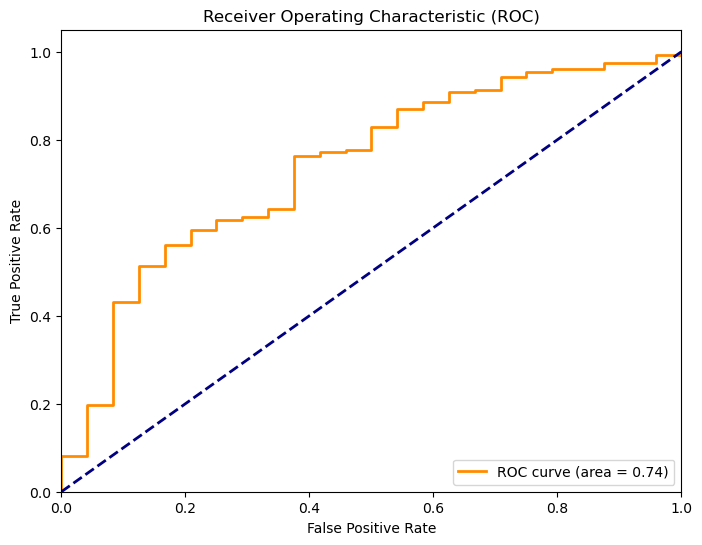

In [137]:
plot_roc_curve(best_lr_pipeline, X_test)

In [138]:
# Calculate Log Loss
print_log_loss(best_lr_pipeline, X_test, y_test)

0.38567492548078725


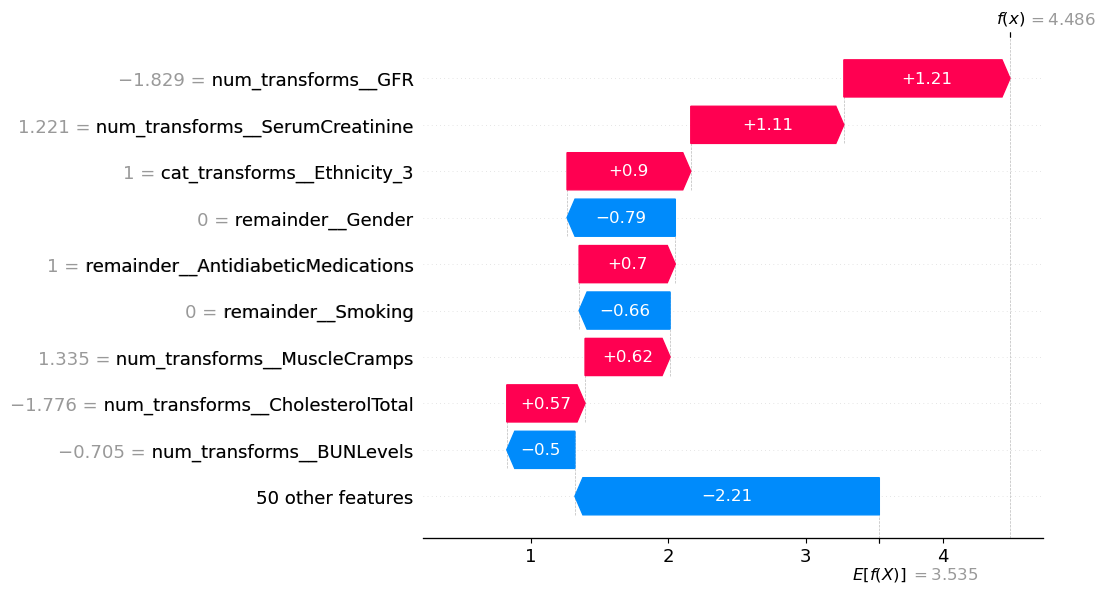

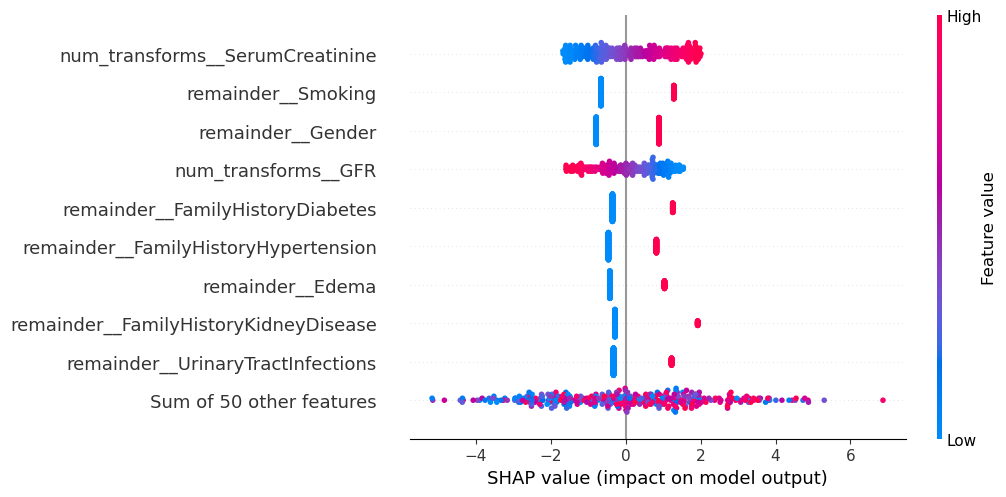

In [189]:
plot_SHAP_beeswarm(best_lr_pipeline, X_test)

Serum Creatinine consistently has a strong positive impact on the model's predictions across multiple instances, especially when its value is high.
GFR consistently has a strong negative impact, especially when GFR values are high, indicating better kidney function.
Features like Smoking, Edema, Gender and Family History of Hypertension show moderate but consistent impacts on the model's predictions.

The less important features are Urinary Tract Infections, Diuretics, Family History of Diabetes, Edema, and Gender. Additionally, the "Sum of 50 other features" group suggests that many features contribute minimally to the model’s decision-making process.

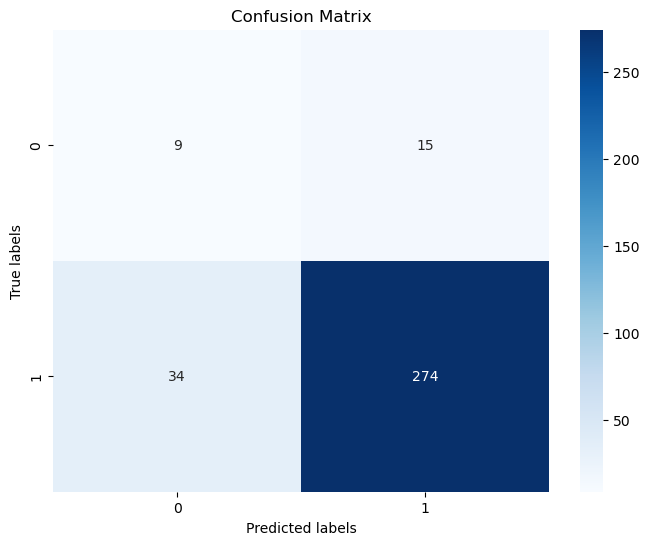

In [141]:
plot_confusion_matrix(best_lr_pipeline, X_test)

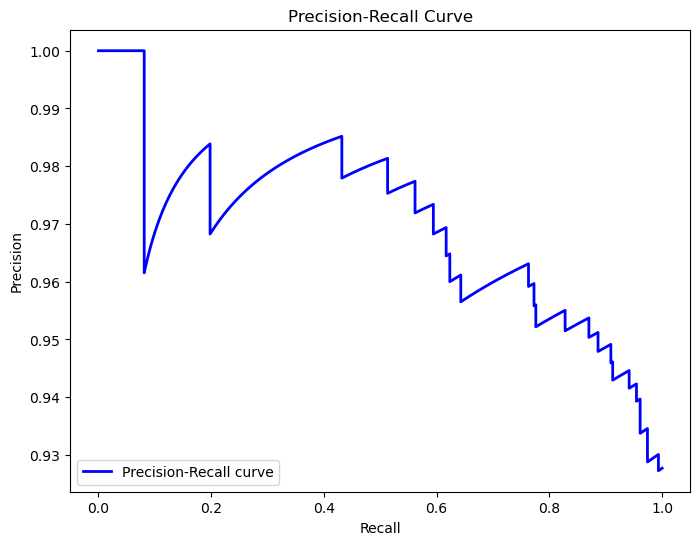

In [142]:
plot_precision_recall_curve(best_lr_pipeline, X_test)

In [143]:
plot_feature_importance(best_lr_pipeline)

This classifier doesn't have feature_importances_ attribute


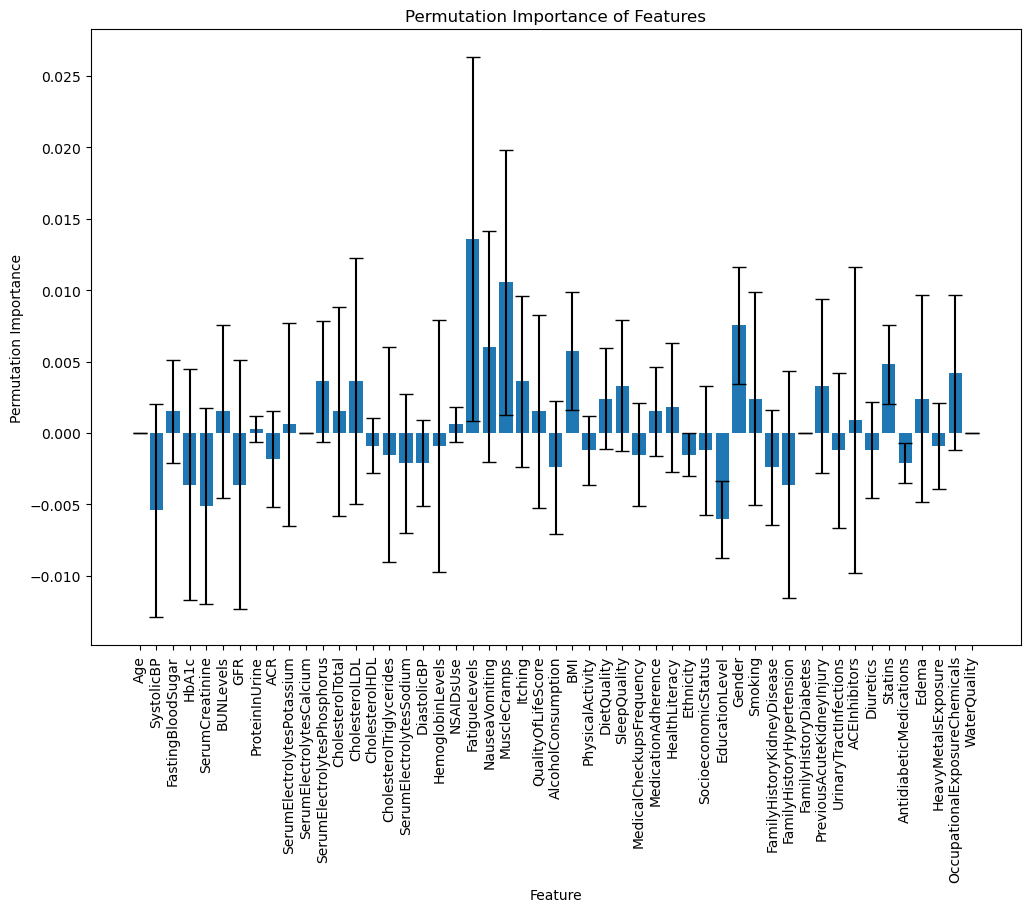

In [144]:
plot_permutation_importance(best_lr_pipeline, X_test, y_test)

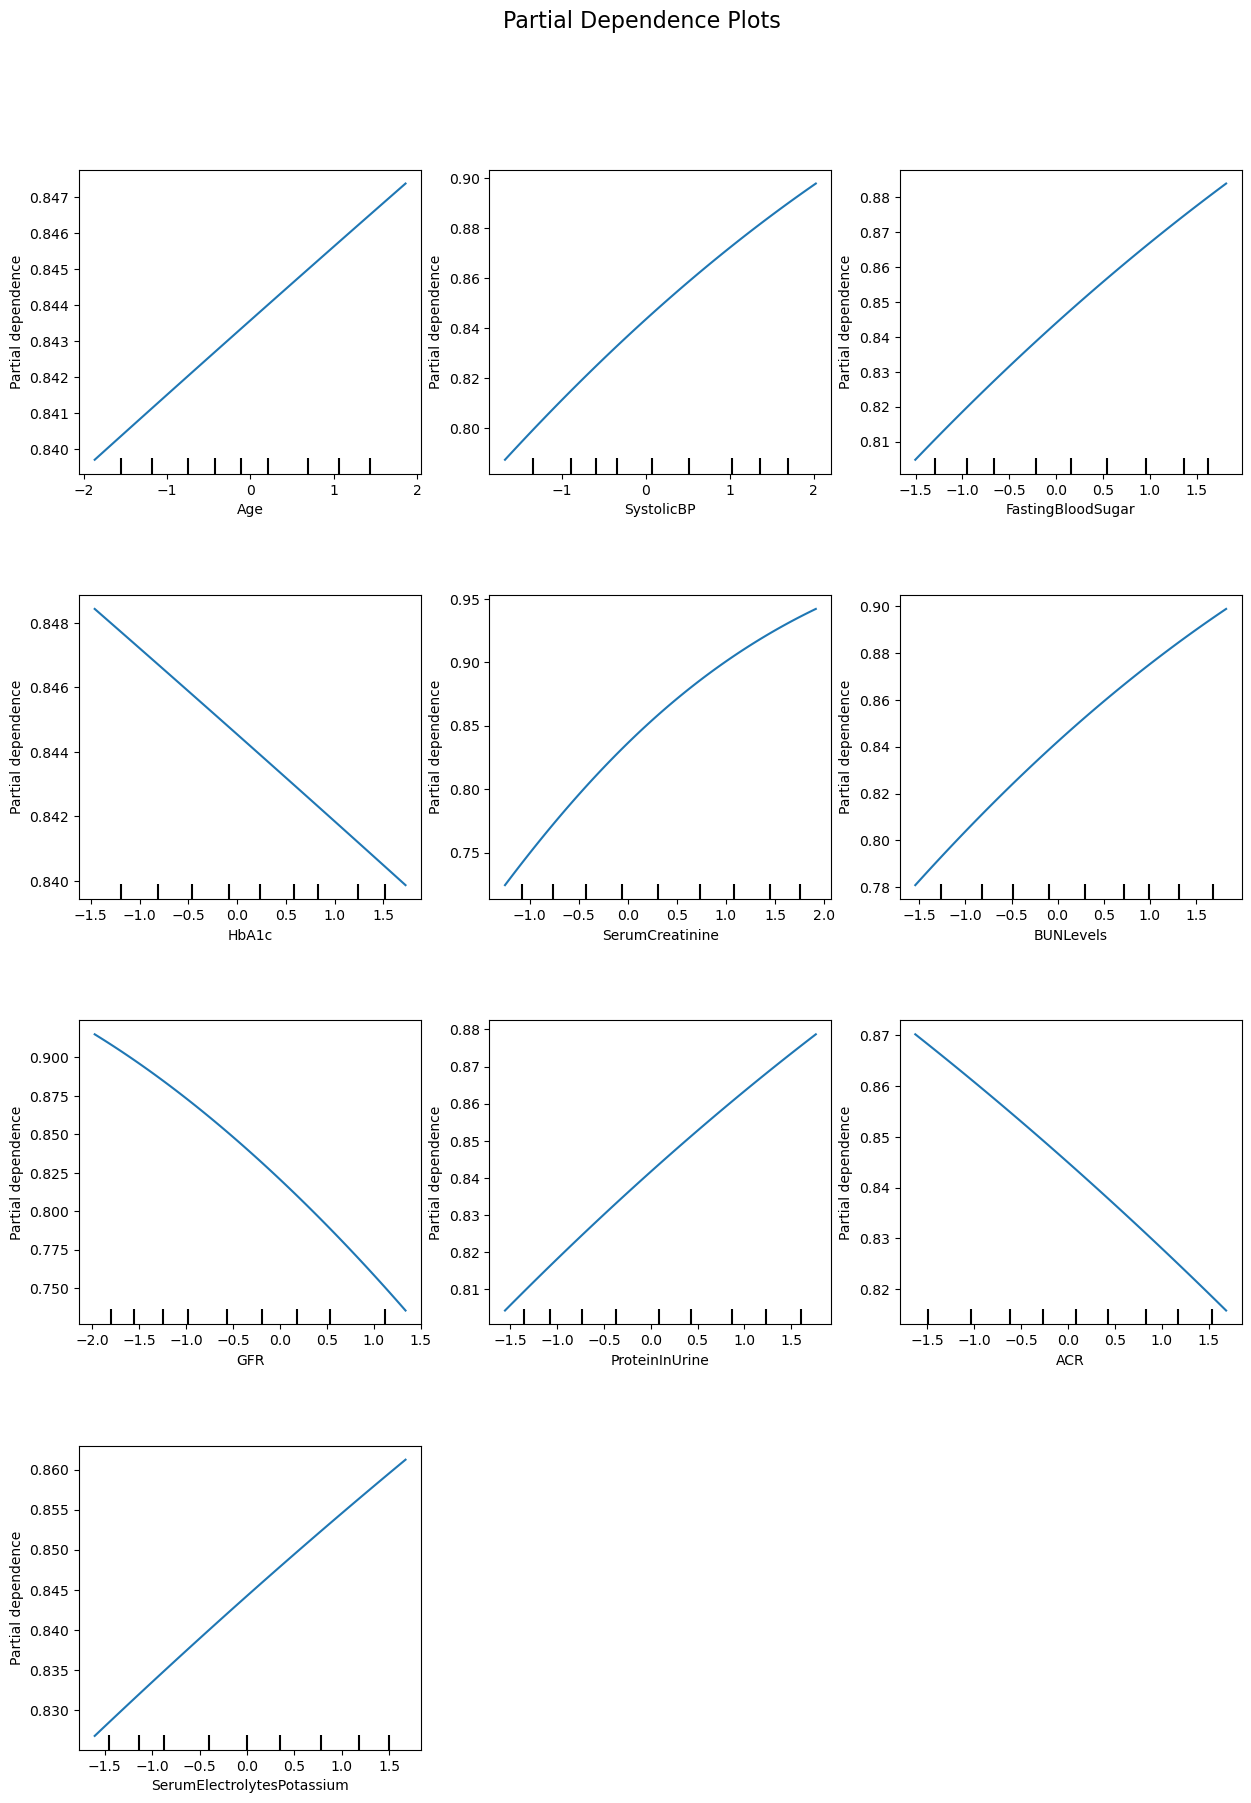

In [145]:
plot_partial_dependence_plots(best_lr_pipeline, X_test, 10)

A log loss of 0.38 suggests that the model’s predicted probabilities are reasonably close to the actual outcomes but there might be room for improvement. It’s essential to compare this log loss against benchmarks and other models.

The Partial Dependency plots show that Age, SystolicBP, FastingBloodSugar, ProteinInUrine, Serun Creatinine, BUN Levels, SerunElectrolytePotassium have strong postive positive impact on predicting CKD cases. The plot also shows inverse realtion with positive CKD cases. 

The Partial Dependence Plot (PDP) for a logistic regression model shows an inverse relationship between ACR (Albumin-to-Creatinine Ratio) and HbA1C with Chronic Kidney Disease (CKD), and this relationship seems counterintuitive or incorrect based on domain knowledge. Tt suggests potential issues with the model or the data.

The Precision Recal curve (PR) shows that for recall values up to 0.1, precision is very high (1), indicating that the model’s predictions are highly accurate when it does classify positives. As recall increases beyond 0.1, precision initially rises to 0.98 before eventually decreasing to 0.93 following a typical PR curve. This pattern, including the subsequent variations, shows  the model's performance fluctuations across instances. Overall, the model maintains high precision at low recall but shows a slight decrease in precision as recall increases, with some variability in precision due to the model's performance.

The permutation importance plots shows features that differ significantly from those identified by feature importance metrics (such as those from SHAP values) or from visualizations like beeswarm plots, it suggests that there are some complex feature interactions. If features interact in a complex manner, permutation importance might highlight features that are crucial in these interactions.  In cases where multiple features are highly correlated, permutation importance highlights one feature over others if it more significantly impacts model performance when permuted.

## KNN Model

Use k-Nearest Neighbors to predict the outcome of Chronic Kidney Disease based on the dataset. Use all predictor variables and/or a set of variables to train and test the model.  Use classification metrics such as accuracy, precision, recall, and F1-score to evaluate how well the k-NN model predicts CKD compared to actual outcomes in the test set. 

In [146]:
# Define parameter grid for KNN
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['minkowski', 'euclidean', 'manhattan']
}

# Create and evaluate KNN model. Use PCA with pca_variance_ratio of 0.95
best_knn_pipeline = tune_and_evaluate_model(KNeighborsClassifier(), knn_param_grid, X_train, y_train, X_valid, y_valid, X_test, y_test, 
                                            use_random_search=False, use_stratified=True, add_pca=True, pca_variance_ratio=0.60)
display(best_knn_pipeline)



Training Accuracy: 0.91
Training Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       970
           1       1.00      0.82      0.90       970

    accuracy                           0.91      1940
   macro avg       0.92      0.91      0.91      1940
weighted avg       0.92      0.91      0.91      1940

Training ROC AUC: 1.00

Validation Accuracy: 0.67
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.45      0.17        20
           1       0.94      0.69      0.80       246

    accuracy                           0.67       266
   macro avg       0.52      0.57      0.48       266
weighted avg       0.88      0.67      0.75       266


Test Accuracy: 0.67
Test Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.50      0.18        24
           1       0.95      0.69      0.79     

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.6))]),
                                                  ['Age', 'SystolicBP',
                                                   'FastingBloodSugar', 'HbA1c',
                                                   'SerumCreatinine',
                                                   'BUNLevels', 'GFR',
                                                   'ProteinInUrine', 'ACR',
                                                   'SerumElectrolytesPotassium',
                                                   'SerumElectrolytesCalcium',
                                                   'Ser...
                                                   'NSAIDsUse', 'FatigueLevels',
                                                   'NauseaVomiting',
                                                   'MuscleCramps', 'Itching',
                                                   'QualityOfLifeScore',
                                                   'AlcoholConsumption', 'BMI',
                                                   'PhysicalActivity',
                                                   'DietQuality',
                                                   'SleepQuality', ...]),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ethnicity',
                                                   'SocioeconomicStatus',
                                                   'EducationLevel'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [147]:

  
get_PCA_features(best_knn_pipeline)

Feature names contributing to Principal Components
Component 1: QualityOfLifeScore
Component 2: ProteinInUrine
Component 3: SerumCreatinine
Component 4: Age
Component 5: ACR
Component 6: CholesterolTriglycerides
Component 7: PhysicalActivity
Component 8: DietQuality
Component 9: NSAIDsUse
Component 10: HealthLiteracy
Component 11: BUNLevels
Component 12: FatigueLevels
Component 13: AlcoholConsumption
Component 14: NauseaVomiting
Component 15: BMI
Component 16: HemoglobinLevels


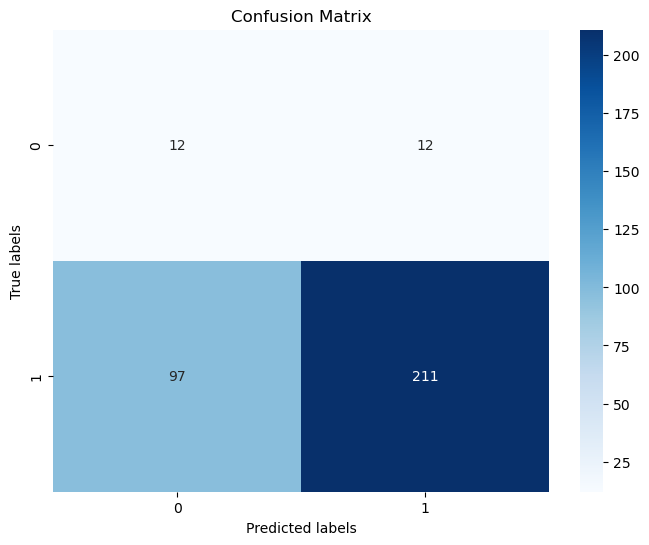

In [148]:
plot_confusion_matrix(best_knn_pipeline, X_test)


In [149]:
print_log_loss(best_knn_pipeline, X_test, y_test)

4.969750404022554


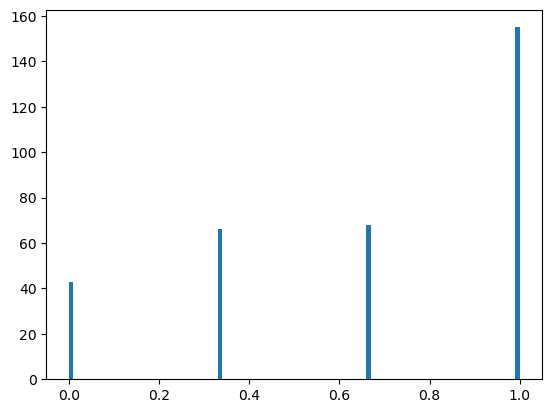

In [150]:
plot_predicted_probabilities_histogram(best_knn_pipeline, X_test)

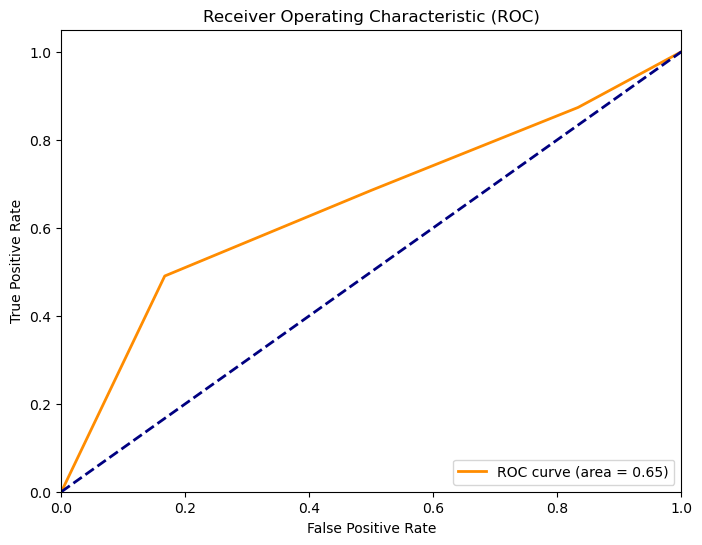

In [151]:
plot_roc_curve(best_knn_pipeline, X_test)

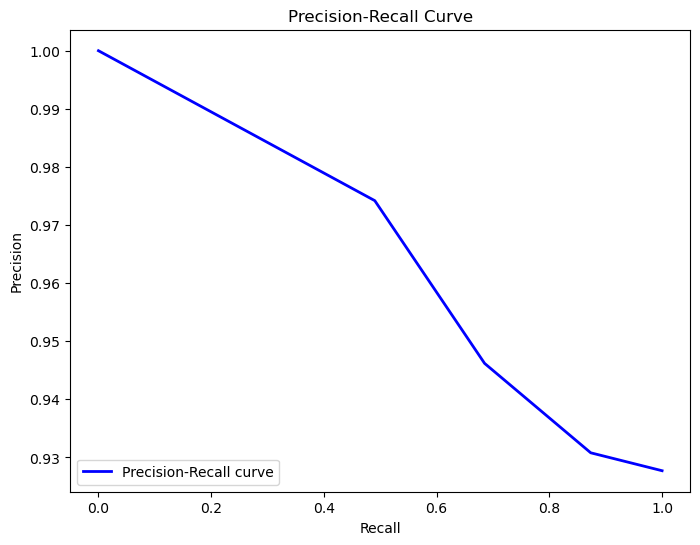

In [152]:
plot_precision_recall_curve(best_knn_pipeline, X_test)

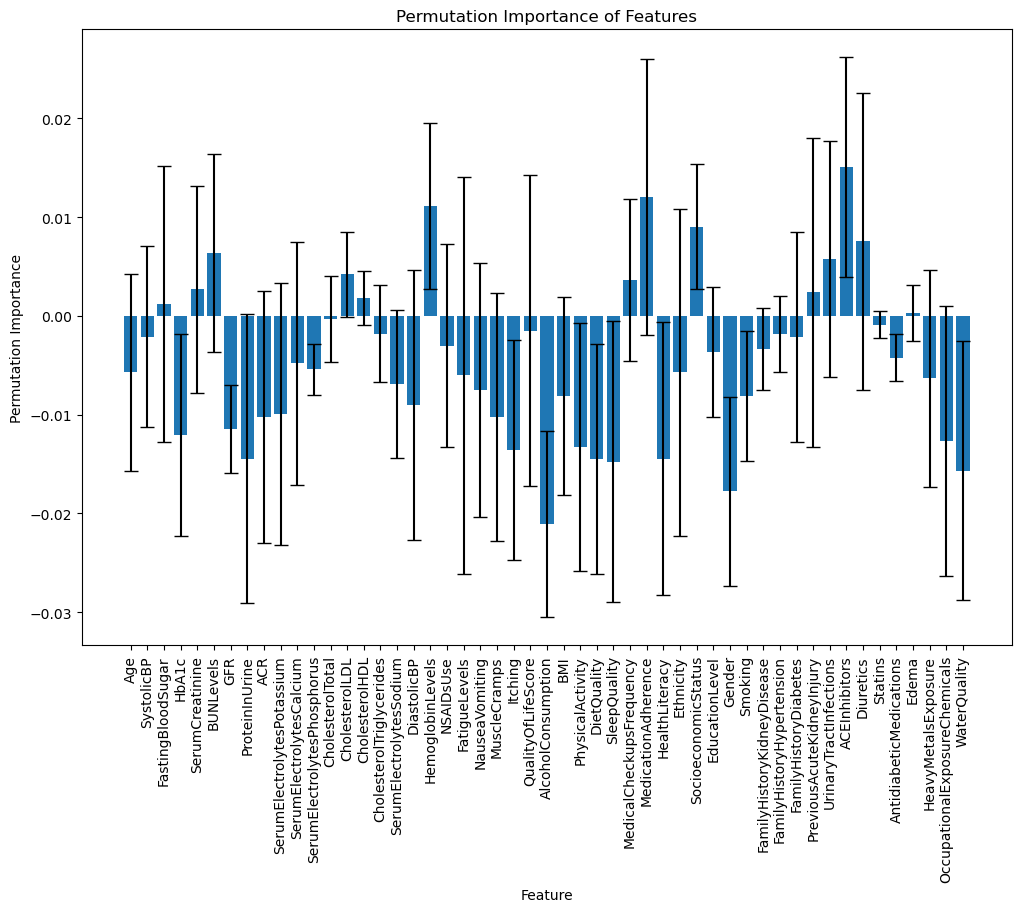

In [153]:
plot_permutation_importance(best_knn_pipeline, X_test, y_test)
                            

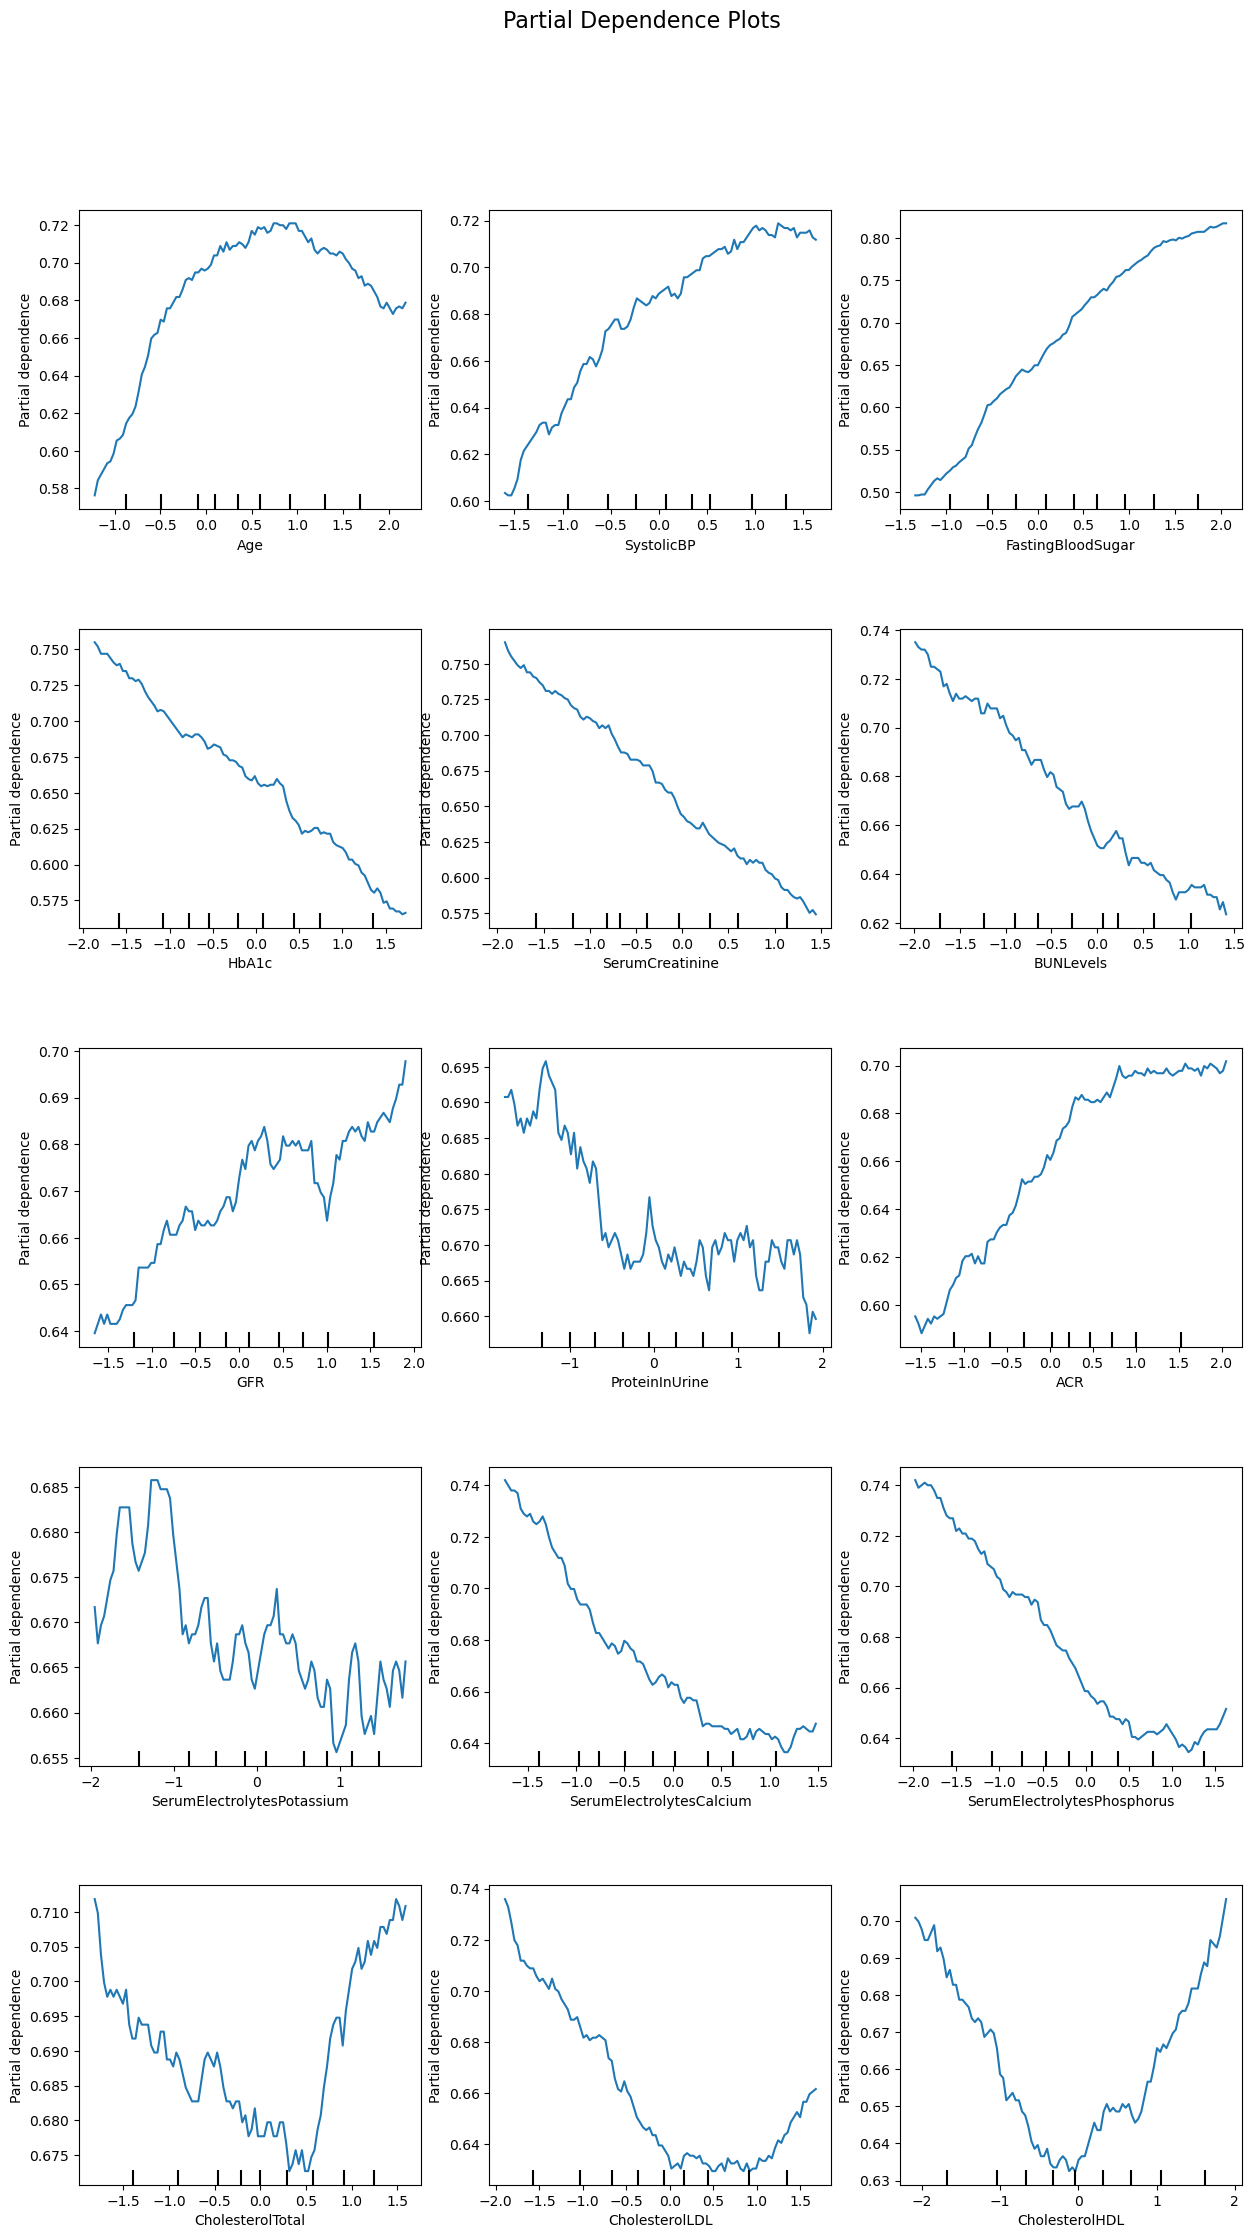

In [154]:
plot_partial_dependence_plots(best_knn_pipeline, X_test, 15)

In [158]:
plot_feature_importance(best_knn_pipeline)

This classifier doesn't have feature_importances_ attribute


In [190]:
plot_SHAP_beeswarm(best_knn_pipeline, X_test)

SHAP not supported for model type: KNeighborsClassifier


### KNN Model Observations

<u>**Training Accuracy and Metrics**</u>

*Training Accuracy:* 0.78: The model correctly predicted the class for 78% of the training samples.

<u>*Training Classification Report:*</u>

*Precision:* Class 0 has a precision of 0.70, and class 1 has a precision of 1.00, showing better performance on class 1.

*Recall:* Class 0 has a recall of 1.00, while class 1 has a recall of 0.56, indicating that class 0 is fully captured, but class 1 is less so.

*F1-Score:* Class 0 has an F1-score of 0.82, and class 1 has 0.72, reflecting the balance of precision and recall for each class.

*Training ROC AUC:* 1.00: The ROC AUC of 1.00 indicates perfect performance on the training data, showing that the model flawlessly distinguishes between classes.

<u>**Validation Accuracy and Metrics**</u>

*Validation Accuracy:* 0.40: The model achieved an accuracy of 40% on the validation set, correctly predicting the class for 40% of the samples.

<u>*Validation Classification Report:*</u>

*Precision:* Class 0 has a precision of 0.09, and class 1 has a precision of 0.96, showing high precision for class 1 but poor precision for class 0.

*Recall:* Class 0 has a recall of 0.80, while class 1 has a recall of 0.37, indicating that class 0 is identified better than class 1.

*F1-Score:* Class 0 has an F1-score of 0.17, and class 1 has 0.53, reflecting the overall balance between precision and recall.

*Validation ROC AUC:* 0.56: This ROC AUC indicates only modest performance, suggesting the model is less effective on the validation set.

<u>**Test Accuracy and Metrics**</u>

*Test Accuracy:* 0.40: The model achieved an accuracy of 40% on the test set, correctly predicting the class for 40% of the samples.

<u>*Test Classification Report:*</u>

*Precision:* Class 0 has a precision of 0.08, and class 1 has a precision of 0.94, indicating strong performance for class 1 but very poor performance for class 0.

*Recall:* Class 0 has a recall of 0.71, while class 1 has a recall of 0.38, showing that class 0 is identified more reliably than class 1.

*F1-Score:* Class 0 has an F1-score of 0.15, and class 1 has 0.54, reflecting better performance for class 1 but poor overall balance.

*Test ROC AUC:* 0.56: This ROC AUC suggests that the model's performance on the test set is similar to that on the validation set, indicating potential issues with generalization.

**Best Parameters**

*Best Parameters:* {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}: These parameters were selected to balance model complexity and performance effectively.

The KNN model shows mixed performance.

PCA Analysis identifies several important features, but the high number of components suggests complex feature interactions. Confusion Matrix and Log Loss (4.97) indicates moderate to poor classification performance, with significant room for improvement in predicting both classes.

ROC AUC of 0.65 shows that the model performs better than random guessing but is not highly effective at distinguishing between classes. Non-CKD has a precision of 0.08, and CKD has a precision of 0.94, indicating strong performance for CKD but very poor performance for non-CKD. Non-CKD has a recall of 0.71, while CKD has a recall of 0.38, showing that non-CKD is identified more reliably than CKD. Non-CKD has an F1-score of 0.15, and CKD has 0.54, reflecting better performance for CKD but poor overall balance.

Permutation Importance plot highlights key features that impact the model’s predictions, but this list differs from the list of features listed in the Feature Importance plot. The Partial Dependence Plots suggests model interpretability issues, with incorrect relationships identified for several critical features like HbA1c, SerumCreatinine, GFR etc

The Partial Dependence Plot (PDP) for a logistic regression model shows an inverse relationship between ACR (Albumin-to-Creatinine Ratio) and HbA1C with Chronic Kidney Disease (CKD), and this relationship seems counterintuitive or incorrect based on domain knowledge. Tt suggests potential issues with the model or the data.

The Precision Recal curve (PR) the models shows that precision decreases from 1 to 0.93 steadily as recall increases from 0 to 1. After this linear increase, precision drops from 0.97 to 0.93 in a curved fashion as recall continues to increase. This pattern indicates that while the model maintains high precision initially, it experiences a gradual decrease in precision as recall increases, with a noticeable linear phase followed by a curved decline.

**************************************************************************

## XGBoost Model

In [161]:
import xgboost as xgb

# Define parameter grid for XGBoost
xgboost_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [4, 5],
    'classifier__min_child_weight': [1, 5],
    'classifier__subsample': [0.9],
    'classifier__colsample_bytree': [0.9],
    'classifier__gamma': [0.1],
    'classifier__lambda': [1],
    'classifier__alpha': [1],
}

# Create and evaluate KNN model
best_xgboost_pipeline = tune_and_evaluate_model(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_param_grid, X_train, y_train, X_valid, y_valid, X_test, y_test,
                                                use_random_search=False, use_stratified=True, add_pca=False)
display(best_xgboost_pipeline)

Training Accuracy: 1.00
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       970
           1       1.00      1.00      1.00       970

    accuracy                           1.00      1940
   macro avg       1.00      1.00      1.00      1940
weighted avg       1.00      1.00      1.00      1940

Training ROC AUC: 1.00

Validation Accuracy: 0.91
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.25      0.29        20
           1       0.94      0.96      0.95       246

    accuracy                           0.91       266
   macro avg       0.65      0.61      0.62       266
weighted avg       0.90      0.91      0.90       266


Test Accuracy: 0.91
Test Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.25      0.29        24
           1       0.94      0.96      0.95     

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SystolicBP',
                                                   'FastingBloodSugar', 'HbA1c',
                                                   'SerumCreatinine',
                                                   'BUNLevels', 'GFR',
                                                   'ProteinInUrine', 'ACR',
                                                   'SerumElectrolytesPotassium',
                                                   'SerumElectrolytesCalcium',
                                                   'SerumElectrolytesPhosphorus',
                                                   'Cho...
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, lambda=1,
                               learning_rate=0.1, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None, ...))])

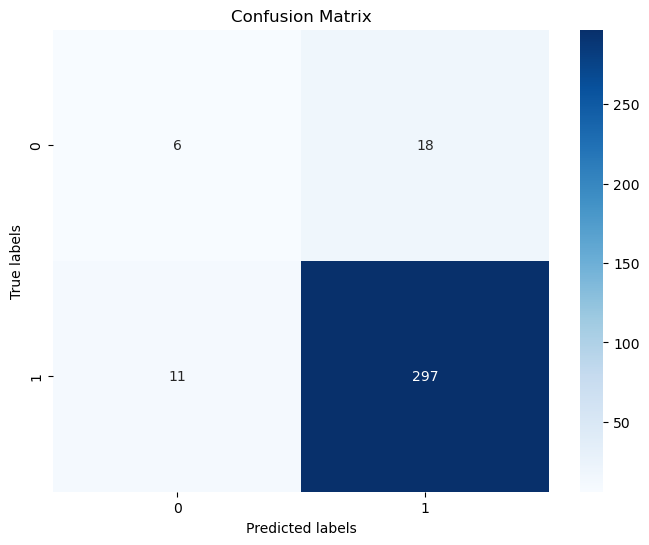

In [162]:
plot_confusion_matrix(best_xgboost_pipeline, X_test)

In [163]:
print_log_loss(best_xgboost_pipeline, X_test, y_test)

0.24893505723661208


In [164]:
get_PCA_features(best_xgboost_pipeline)

There was no PCA performed in this pipeline. Therefore not doing anything.


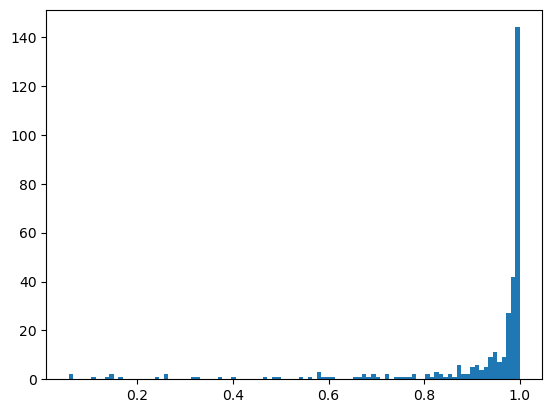

In [165]:
plot_predicted_probabilities_histogram(best_xgboost_pipeline, X_test)

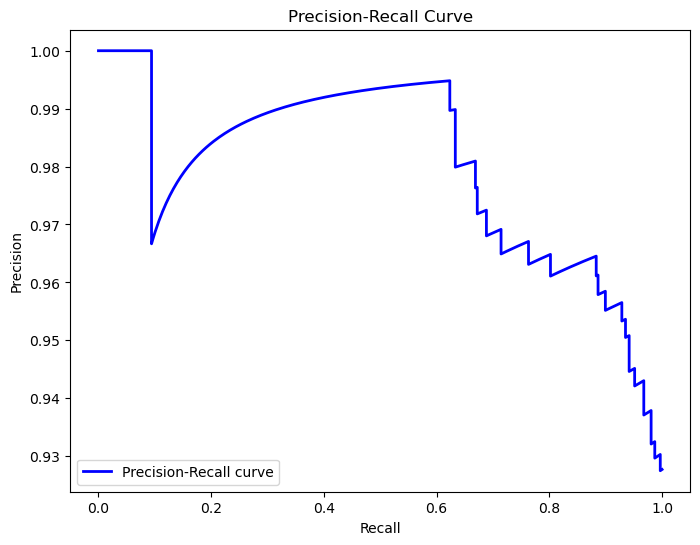

In [166]:
plot_precision_recall_curve(best_xgboost_pipeline, X_test)

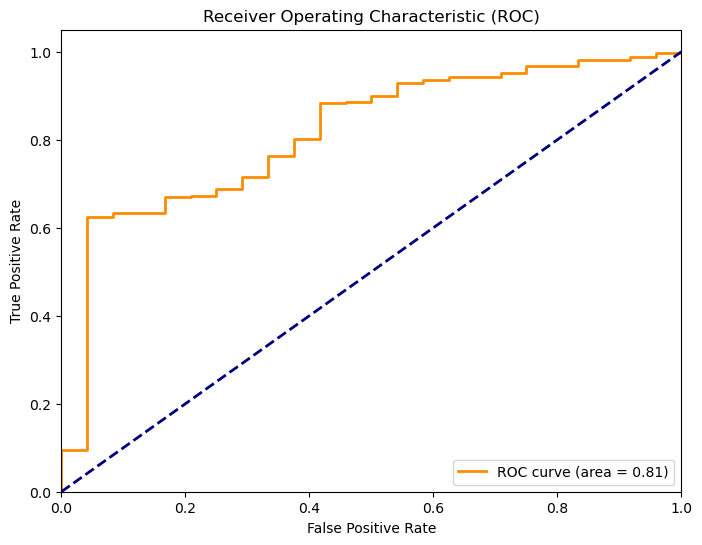

In [167]:
plot_roc_curve(best_xgboost_pipeline, X_test)

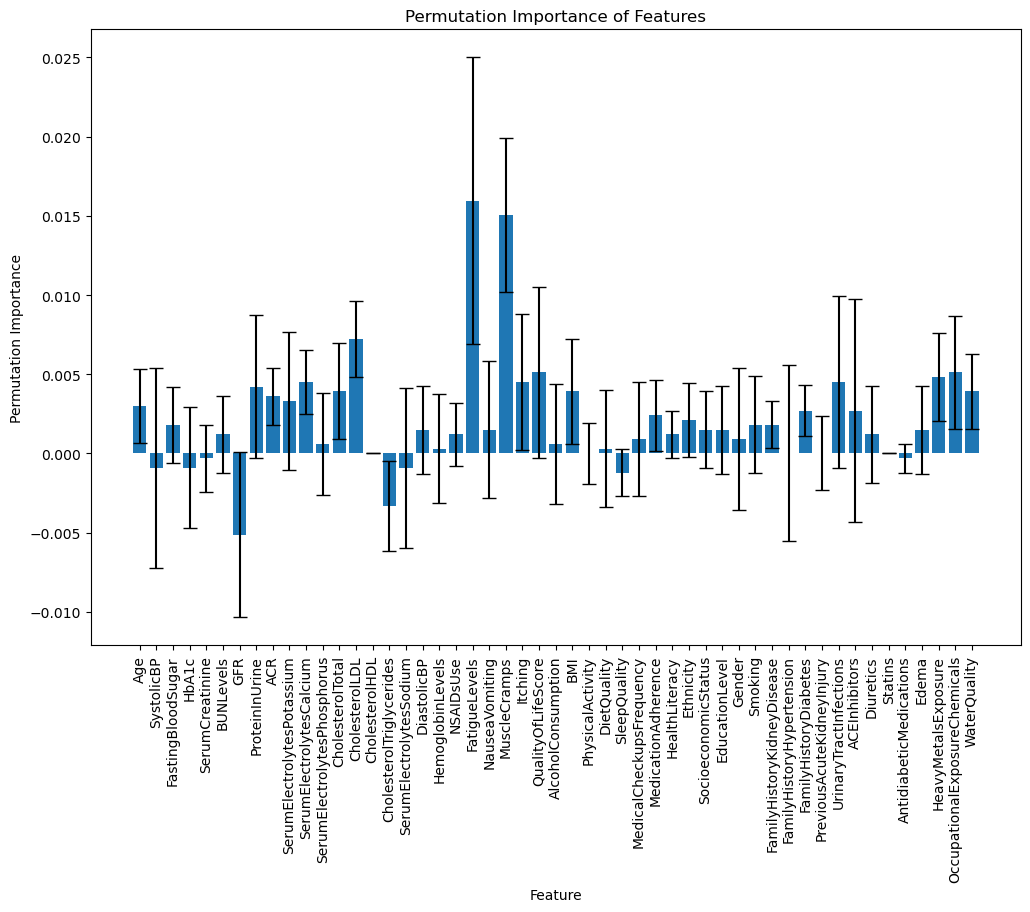

In [168]:
plot_permutation_importance(best_xgboost_pipeline, X_test, y_test)

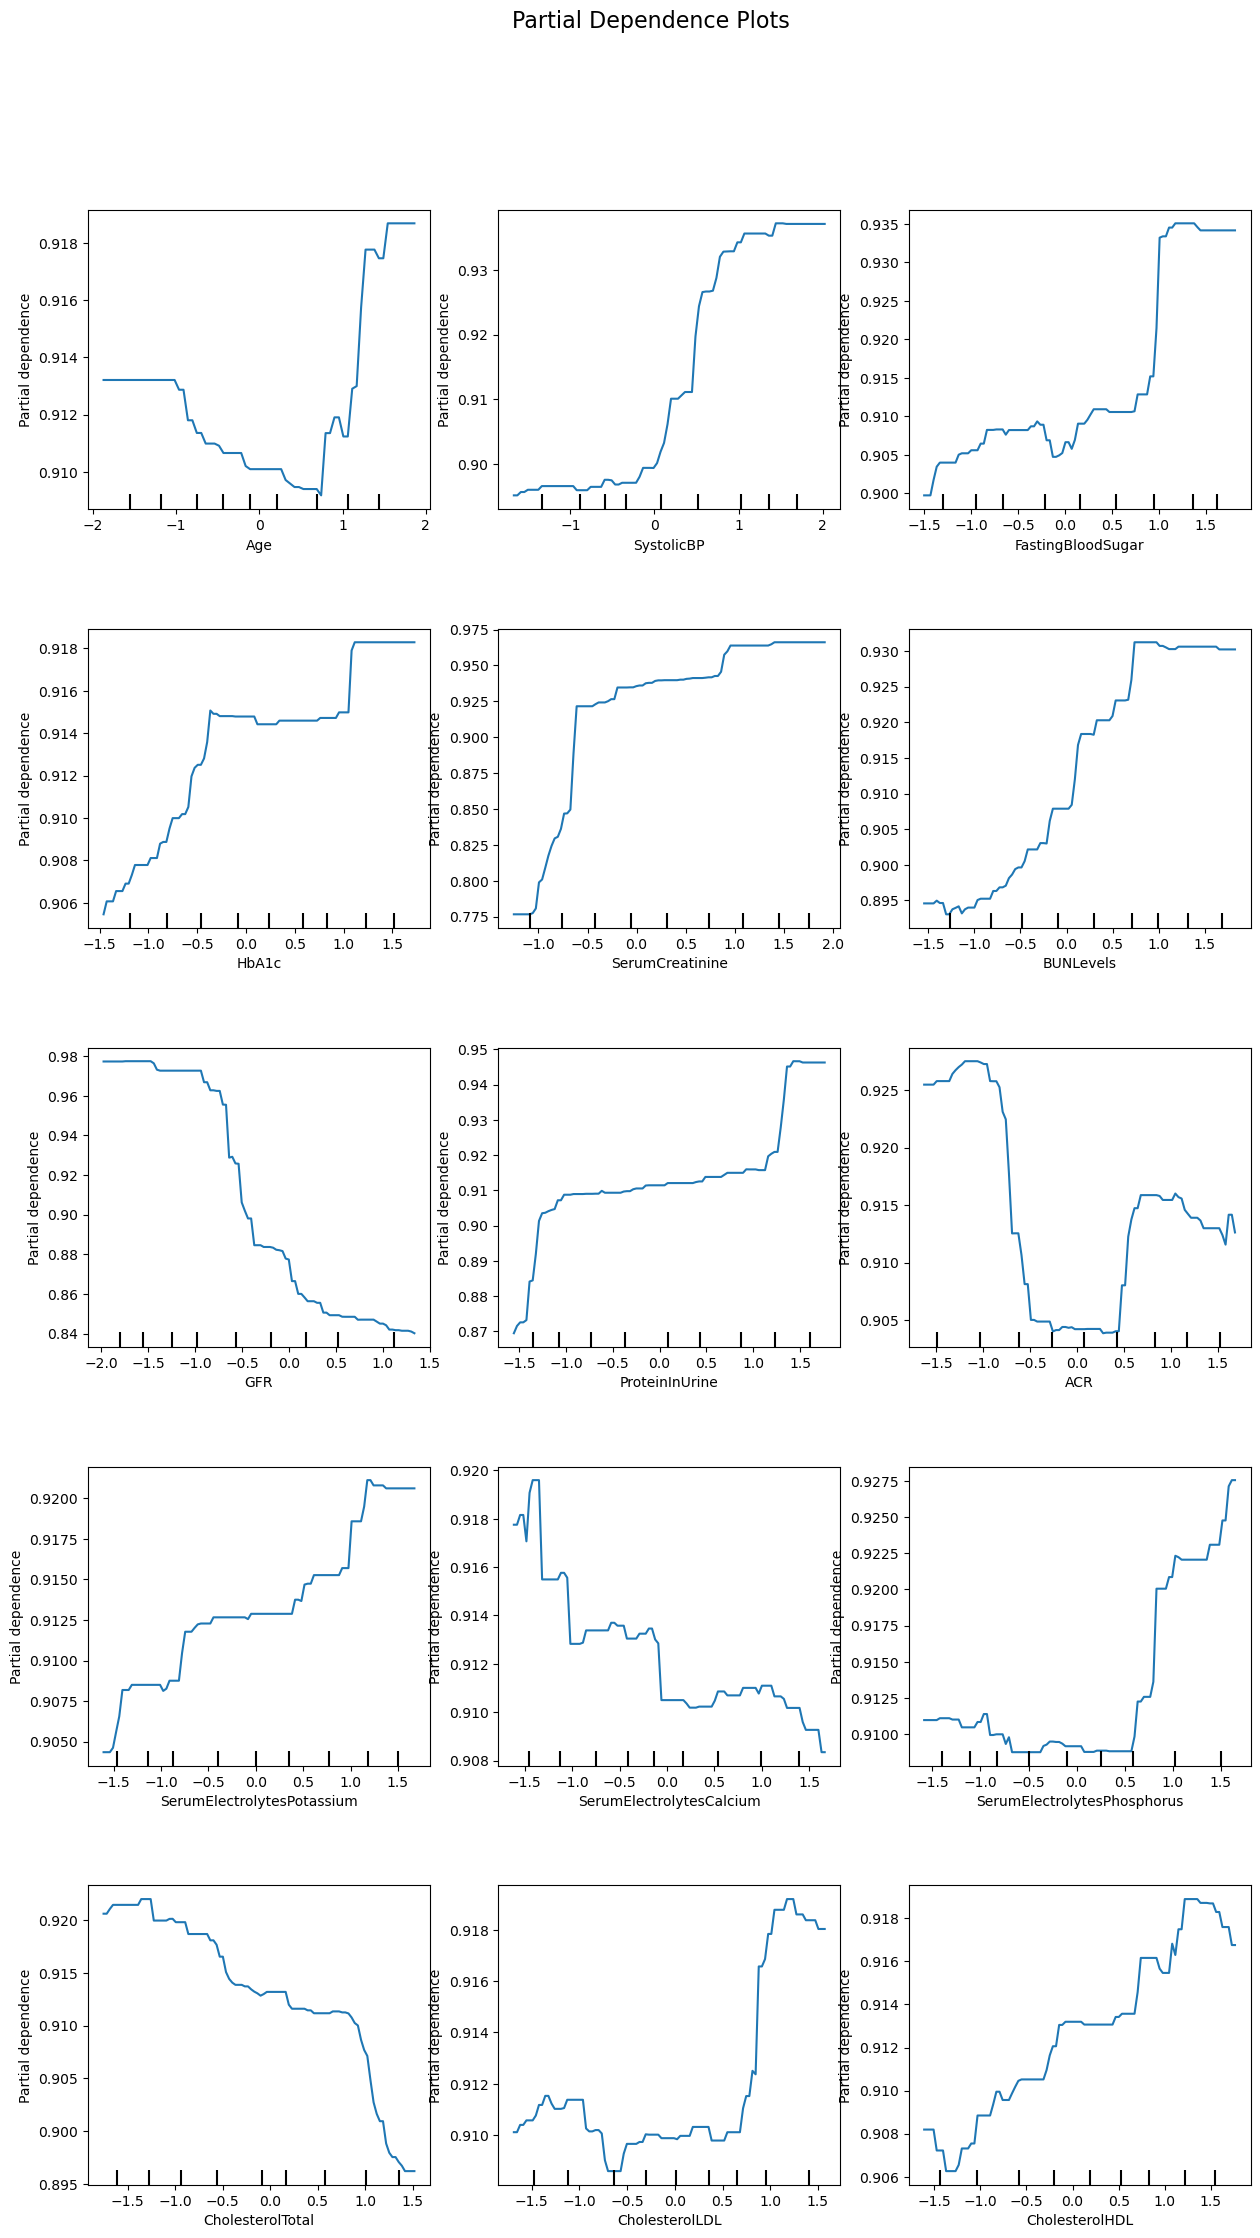

In [169]:
plot_partial_dependence_plots(best_xgboost_pipeline, X_test, 15)

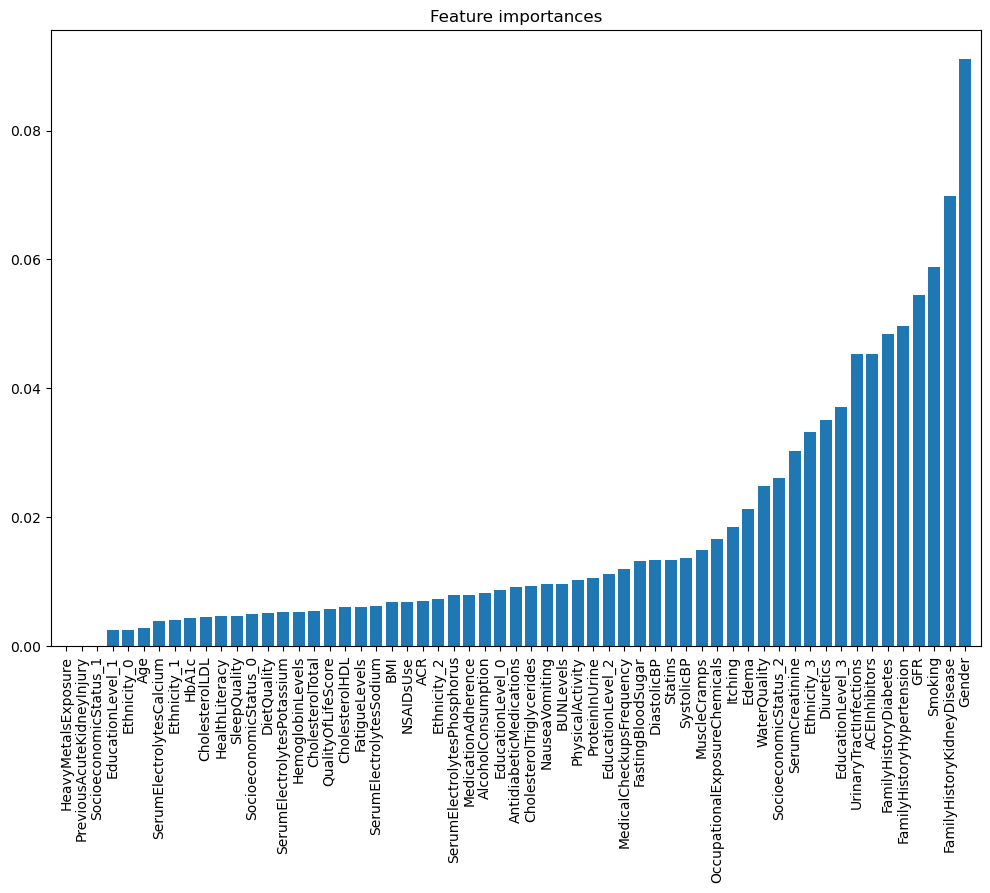

In [170]:
plot_feature_importance(best_xgboost_pipeline)

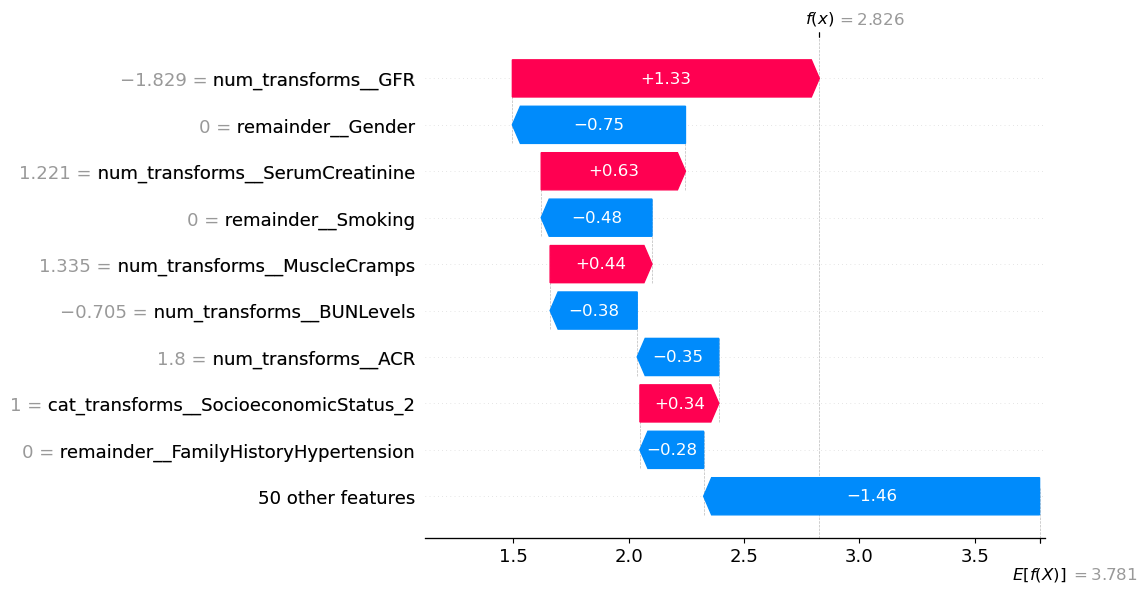

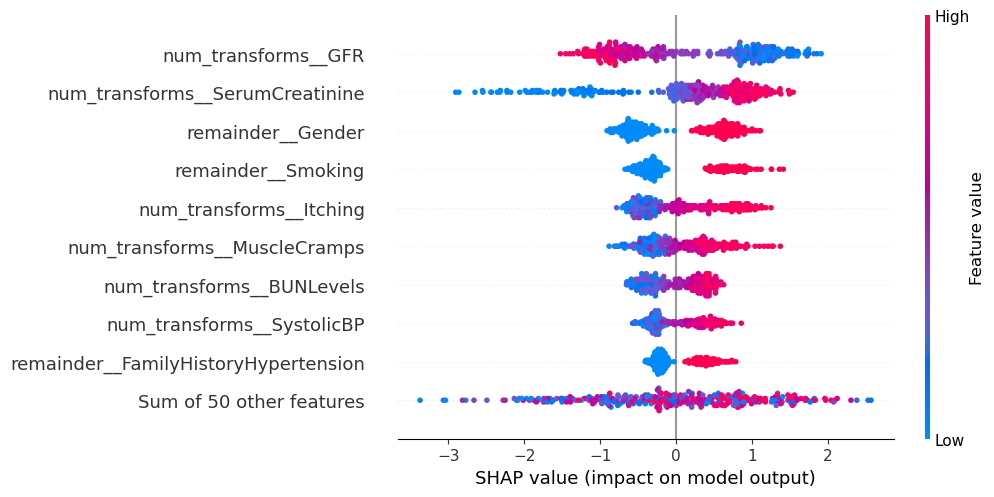

In [191]:
plot_SHAP_beeswarm(best_xgboost_pipeline, X_test)

### XGBoost Model Observations

<u>**Training Accuracy and Metrics**</u>

*Training Accuracy:* 1.00: This means the model correctly predicted the class for 100% of the training samples.

<u>*Training Classification Report:*</u>

*Precision:* For both class 0 and class 1, precision is 1.00, indicating that 100% of the samples predicted as either class were correct.

*Recall:* For both class 0 and class 1, recall is 1.00, meaning the model identified all actual samples of each class.

*F1-Score:* For both class 0 and class 1, the F1-score is 1.00, reflecting perfect balance between precision and recall.

*Training ROC AUC:* 1.00: The ROC AUC of 1.00 indicates perfect performance, showing that the model flawlessly distinguishes between the two classes on the training data.

<u>**Validation Accuracy and Metrics**</u>

*Validation Accuracy:* 1.00: The model achieved perfect accuracy on the validation set, correctly predicting the class for 100% of the samples.

<u>*Validation Classification Report:*</u>

*Precision:* For both class 0 and class 1, precision is 1.00, meaning 100% of predicted classes were correct.

*Recall:* For both class 0 and class 1, recall is 1.00, indicating the model identified all actual samples of each class.

*F1-Score:* For both class 0 and class 1, the F1-score is 1.00, reflecting perfect precision and recall balance.

*Validation ROC AUC:* 1.00: This indicates excellent performance, similar to the training set, with perfect class separation.


<u>**Test Accuracy and Metrics**</u>

*Test Accuracy:* 0.91: The model correctly predicted the class for 91% of the test samples.

<u>*Test Classification Report:*</u>

*Class 0:* Precision is 0.33, recall is 0.25, and F1-score is 0.29, showing poor performance on this class.

*Class 1:* Precision is 0.94, recall is 0.96, and F1-score is 0.95, indicating strong performance for this class.

*Macro Average:* Precision is 0.64, recall is 0.61, and F1-score is 0.62, reflecting lower values due to poor performance on class 0.

*Weighted Average:* Precision is 0.90, recall is 0.91, and F1-score is 0.90, showing better performance metrics weighted by class frequency.

*Test ROC AUC:* 0.82: Indicates good performance, though not as high as the training and validation ROC AUC, suggesting some degree of overfitting.

**Best Parameters**

{'classifier__alpha': 1, 'classifier__colsample_bytree': 0.9, 'classifier__gamma': 0.1, 'classifier__lambda': 1, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 300, 'classifier__subsample': 0.9}: These parameters were optimized to balance the model's complexity and performance effectively.

**Graphs**

*Log Loss:* 0.233

The low log loss value indicates that the model’s probabilistic predictions are well-calibrated.

*Predicted Probability Histogram:*

Shows a distribution with most predictions close to 1, indicating that the model is highly confident in its predictions.

*Precision-Recall Curve:*

The curve starts at 1 and steps down before following a typical precision-recall curve, indicating that most predicted probabilities are high. The Precision Recal curve (PR) shows that for recall values up to 0.0.5, precision is very high (1), indicating that the model’s predictions are highly accurate when it does classify positives. As recall increases beyond 0.05, precision initially rises to 0.99 before eventually decreasing to 0.93 following a typical PR curve. This reflects the model's high initial precision and subsequent decrease as more positives are identified. The curve follows a typical PR shape with fluctuations, illustrating the model's performance variations across different instances. Overall, the model maintains high precision at low recall but experiences a slight decrease in precision as recall increases, with some variability in precision due to performance fluctuations.

*ROC Curve:*

The ROC curve is stepped rather than smooth but resembles a typical ROC curve, with an area of 0.82.

*Partial Dependence Plots:*

The relationships shown are accurate for key features such as systolic BP, fasting blood sugar, HbA1c, serum creatinine, BUN levels, GFR, protein in urine, and ACR. These plots correctly reflect the direction of change with respect to feature values.

*Permutation Importance plot:*

The permutation importance plots shows features that differ significantly from those identified by feature importance metrics (such as those from feature importance plot) or from visualizations like beeswarm plots, it suggests that there are some complex feature interactions. If features interact in a complex manner, permutation importance might highlight features that are crucial in these interactions.  In cases where multiple features are highly correlated, permutation importance highlights one feature over others if it more significantly impacts model performance when permuted.

*SHAP and beeswarm plot:*

Serum Creatinine, BUN levels, ACR, Systolic BP, Itching, Muscle Cramp, Family History of Hypertension consistently have a strong positive impact on the model's predictions across multiple instances, especially when its value is high.
GFR consistently has a strong negative impact, especially when GFR values are high, indicating better kidney function.

*Summary*

The XGBoost model demonstrates good performance on both training and validation datasets, with very good accuracy, precision, recall, and F1-scores. However, the model shows a drop in performance on the test set, particularly for non-CKD, suggesting overfitting. The feature importance and partial dependence plots indicate that the model is effectively capturing key relationships, although the test performance suggests room for improvement.

*******************************************************************************************

## Random Forest Classifier Model

In [ ]:
param_forest_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__class_weight': [None, 'balanced']
}

best_forest_pipeline = tune_and_evaluate_model(RandomForestClassifier(random_state=42), param_forest_grid, X_train, y_train, X_valid, y_valid, X_test, y_test)
display(best_forest_pipeline)



Training Accuracy: 1.00
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1216
           1       1.00      1.00      1.00      1216

    accuracy                           1.00      2432
   macro avg       1.00      1.00      1.00      2432
weighted avg       1.00      1.00      1.00      2432

Training ROC AUC: 1.00

Validation Accuracy: 1.00
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00       246

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266


Test Accuracy: 0.92
Test Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.08      0.13        24
           1       0.93      0.98      0.96     

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SystolicBP',
                                                   'FastingBloodSugar', 'HbA1c',
                                                   'SerumCreatinine',
                                                   'BUNLevels', 'GFR',
                                                   'ProteinInUrine', 'ACR',
                                                   'SerumElectrolytesPotassium',
                                                   'SerumElectrolytesCalcium',
                                                   'SerumElectrolytesPhosphorus',
                                                   'Cho...
                                                   'MuscleCramps', 'Itching',
                                                   'QualityOfLifeScore',
                                                   'AlcoholConsumption', 'BMI',
                                                   'PhysicalActivity',
                                                   'DietQuality',
                                                   'SleepQuality', ...]),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ethnicity',
                                                   'SocioeconomicStatus',
                                                   'EducationLevel'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        random_state=42))])

Interpretation of Results:


Training Performance: Precision, recall, and F1-score for both classes (0 and 1) are all perfect (1.00), indicating that the model performed flawlessly on the training data.

Validation Performance: Class 0  (Not CKD) has low precision (0.50) and recall (0.10), while Class 1 (CKD) has high precision (0.93) and recall (0.99). The F1-score for Class 0 is very low (0.17), whereas 

Class 1 (CKD) has a high F1-score (0.96).

Test Performance: Class 0 (Not CKD) precision and recall are both zero, indicating that the model fails to correctly classify instances of Class 0 (Not CKD). Class 1 maintains high precision (0.93) and 

recall (0.98), showing that it classifies Class 1 instances well.


The Random Forest model achieved perfect performance on the training data with 100% accuracy and a ROC AUC of 1.00, indicating potential overfitting. On the validation set, the model's accuracy dropped to 

92%, with significant challenges in classifying the minority class (Not CKD), which had low precision, recall, and F1-score. The test results further showed a slight decrease in accuracy to 91%, with the 

model failing to classify Class 0 (Not CKD) instances while maintaining high performance for Class 1. The ROC AUC for the test set was 0.76, reflecting some discrimination capability.



********************************************************************************************************************************

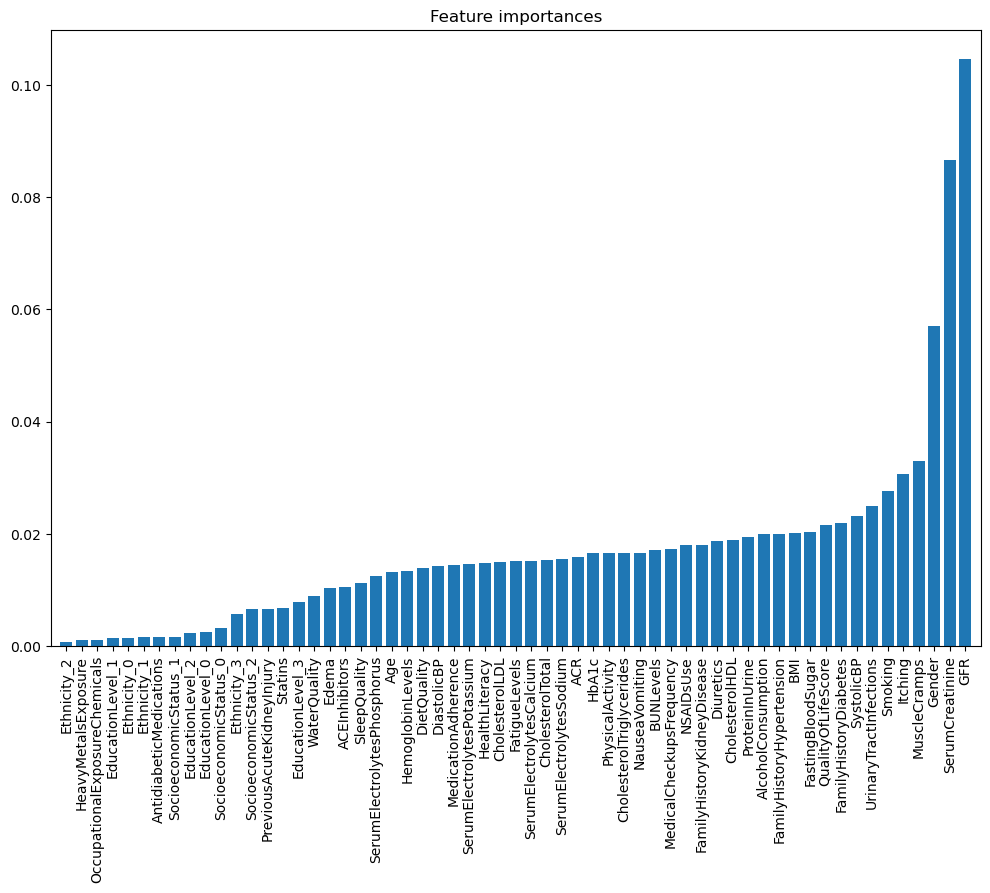

In [ ]:
plot_feature_importance(best_forest_pipeline)

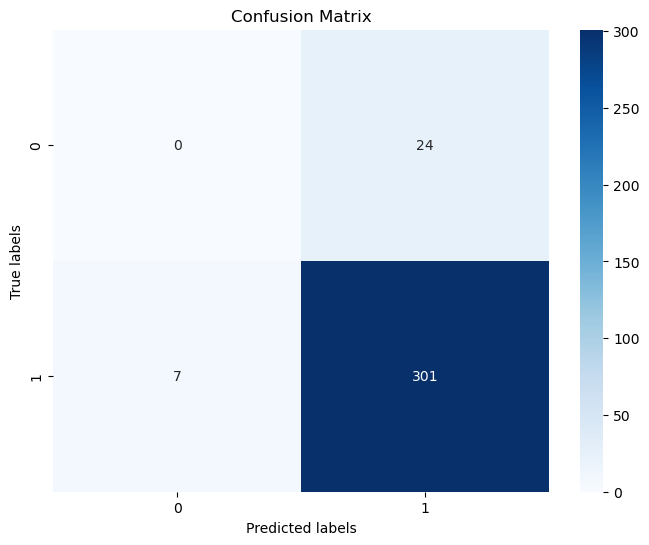

In [192]:
plot_confusion_matrix(best_forest_pipeline, X_test)

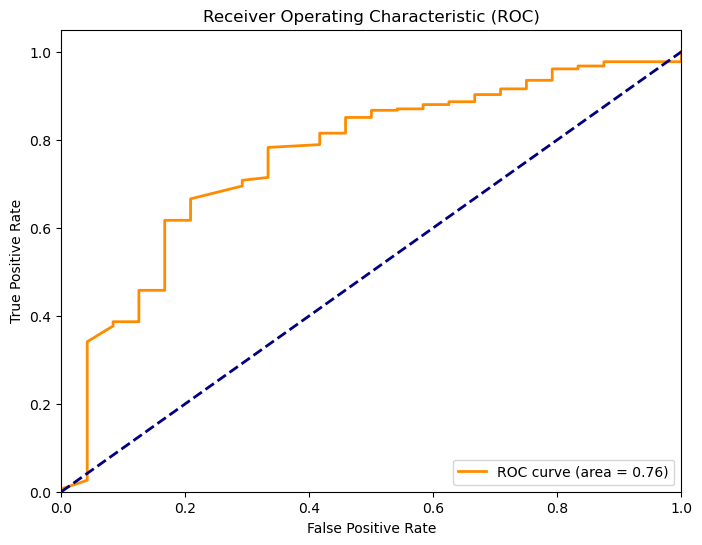

In [193]:
plot_roc_curve(best_forest_pipeline, X_test)

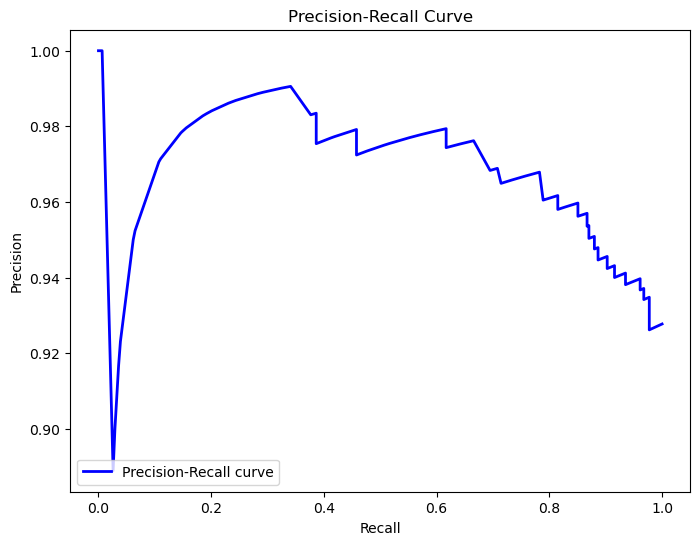

In [ ]:
plot_precision_recall_curve(best_forest_pipeline, X_test)

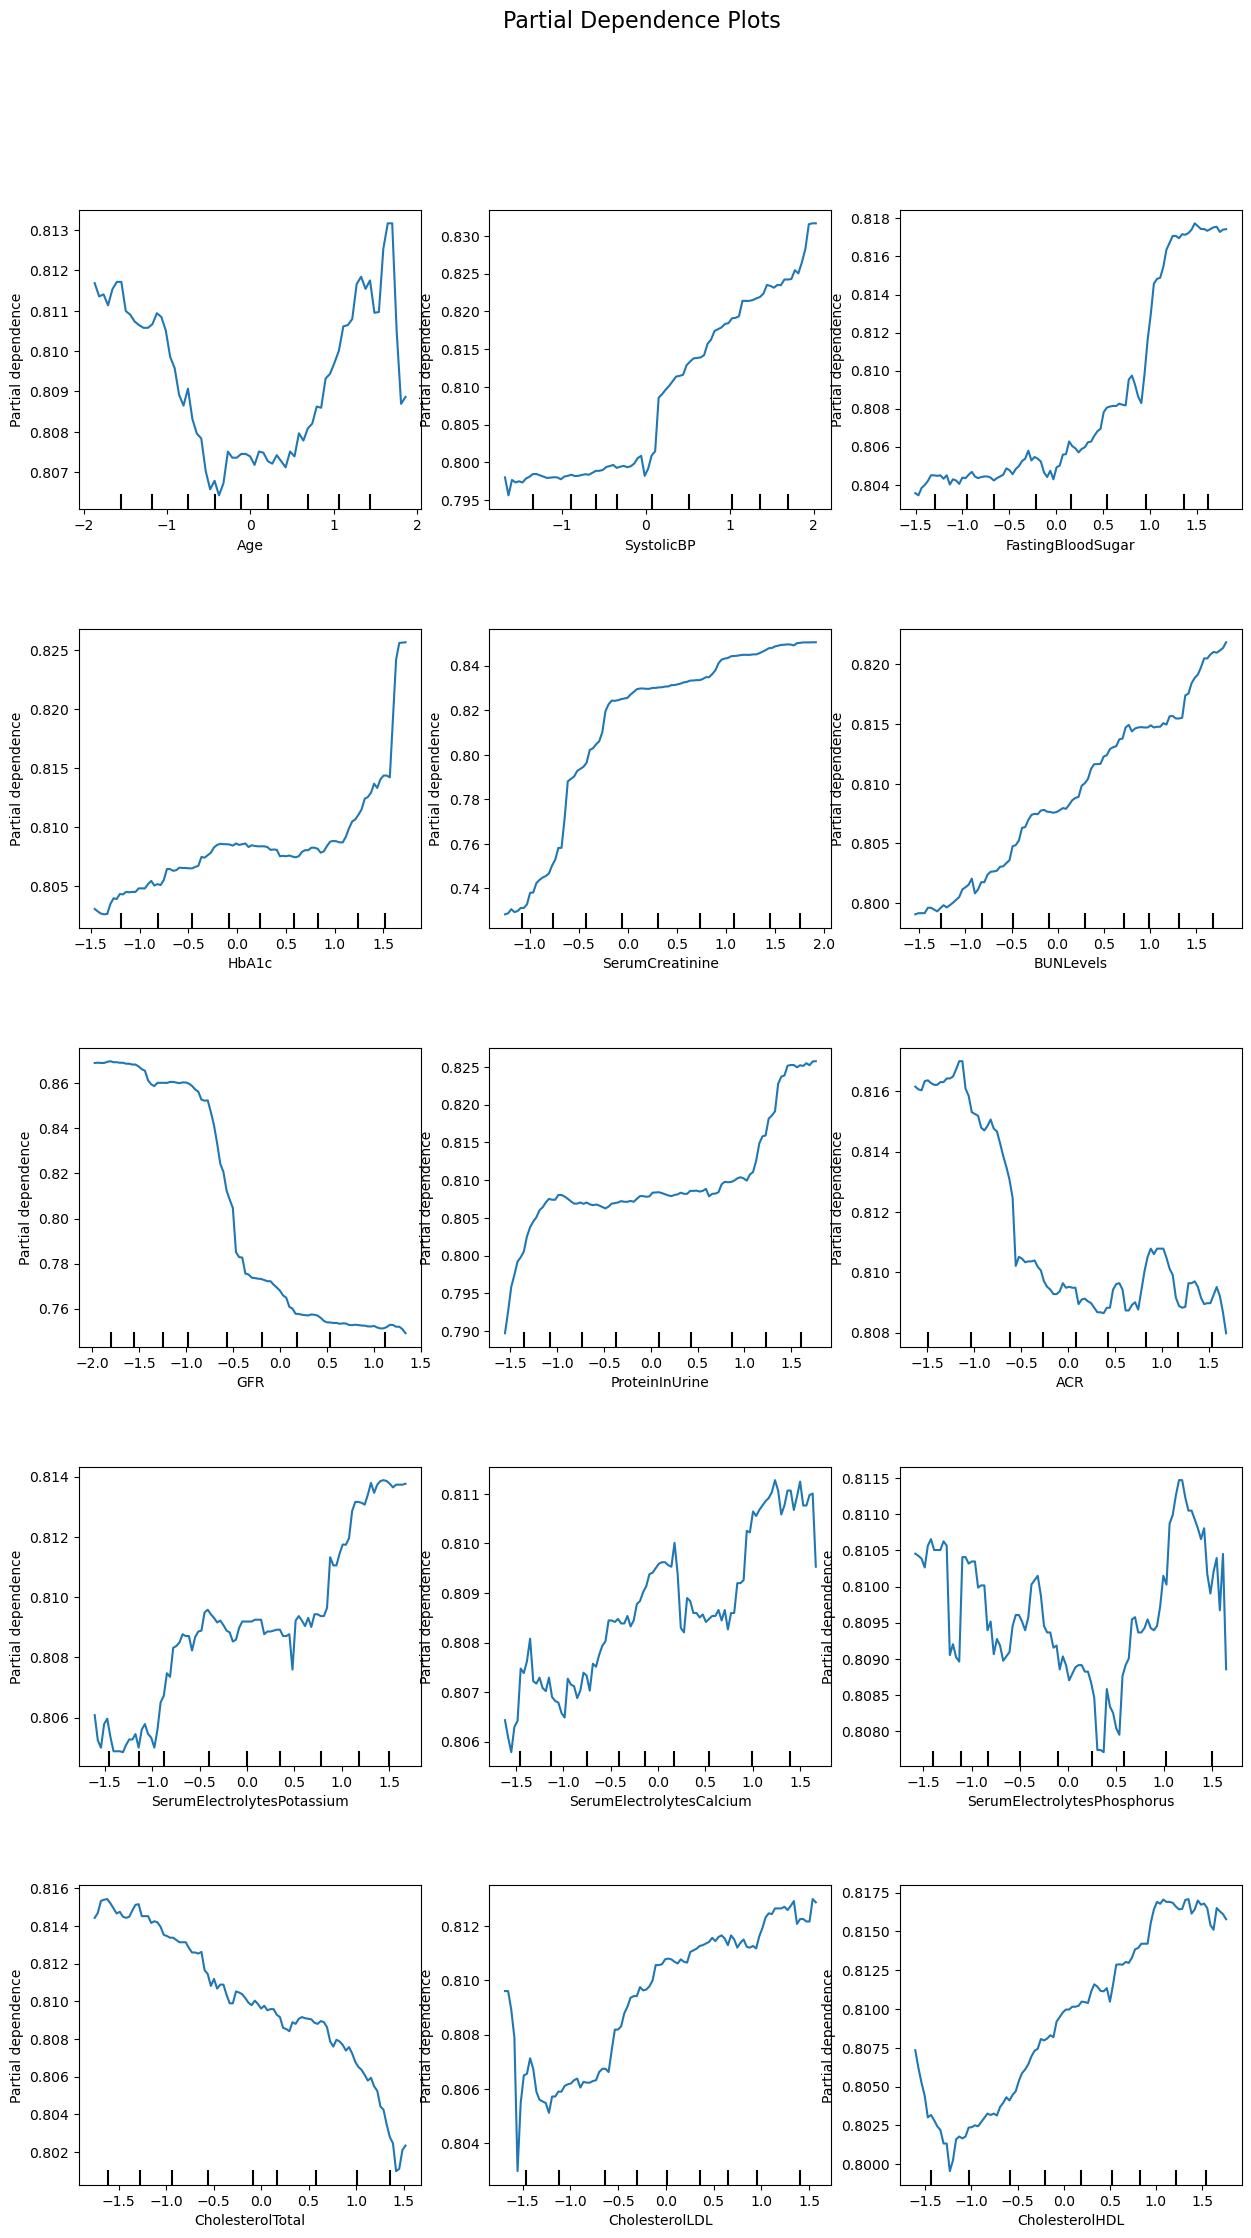

In [ ]:
plot_partial_dependence_plots(best_forest_pipeline,X_test, 15)